# Data Mining

## Problem Statement

### Context

The State_wise_Health_income.csv dataset given is about the Health and economic conditions in different States of a country. The Group States based on how similar their situation is, so as to provide these groups to the government so that appropriate measures can be taken to escalate their Health and Economic conditions.


### Objective

The objective of the analysis is to cluster the states based on the given dataset "State_wise_Health_income.csv," considering both health and economic indicators. By grouping states with similar conditions, the goal is to provide the government with valuable insights for implementing targeted measures to improve the health and economic conditions of each group.


###  Data Description

1. States: Names of States
2. Health_indeces1: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in the State.
3. Health_indeces2: A composite index rolls several related measures (indicators) into a single score that provides a summary of how the health system is performing in certain areas of the States.
4. Per_capita_income: Per capita income (PCI) measures the average income earned per person in a given area (city, region, country, etc.) in a specified year. It is calculated by dividing the area's total income by its total population.
5. GDP: GDP provides an economic snapshot of a country/state, used to estimate the size of an economy and growth rate.

### **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing Libraries

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# mounting g-drive to this notebook

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Great Learning/Dataset2/State_wise_Health_income-1.csv")

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [ ]:
data.shape

(296, 6)

In [ ]:
print(f"The dataset has: {data.shape[0]} rows & {data.shape[1]} columns")

The dataset has: 296 rows & 6 columns


* The dataset has 296 rows and 6 columns

### Displaying few rows of the dataset

In [ ]:
data.head()

,Unnamed: 0,States,Health_indices1,Health_indices2,Per_capita_income,GDP
0,0,Bachevo,417,66,564,1823
1,1,Balgarchevo,1485,646,2710,73662
2,2,Belasitsa,654,299,1104,27318
3,3,Belo_Pole,192,25,573,250
4,4,Beslen,43,8,528,22


### Creating a Copy of the Original Data

In [ ]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
#df.head()

### Checking the data types of the columns for the dataset

In [ ]:
# checking datatypes and number of non-null values for each column
df.dtypes

,0
Unnamed: 0,int64
States,object
Health_indices1,int64
Health_indices2,int64
Per_capita_income,int64
GDP,int64


- All the columns in the data are integer type except the 'State' column which is object type.

### Checking the missing values

In [ ]:
# checking for missing values
df.isnull().sum().sum()

0

- There are no missing values in the data.

### Checking the unique values

In [ ]:
# checking the number of unique values in each column
data.nunique()

,0
Unnamed: 0,296
States,296
Health_indices1,277
Health_indices2,248
Per_capita_income,278
GDP,285


### Dropping variables

**We will drop the *"Unnamed: 0* as it do not add any value to the analysis.**

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
df.head(1)

,States,Health_indices1,Health_indices2,Per_capita_income,GDP
0,Bachevo,417,66,564,1823


### Statistical summary of the dataset

In [ ]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Health_indices1,296.0,2629.195946,2041.890970,-10.0,640.0,2446.5,4102.75,10219.0
Health_indices2,296.0,693.594595,469.738035,0.0,173.5,810.5,1076.00,1508.0
Per_capita_income,296.0,2159.597973,1493.663013,500.0,746.0,1869.0,3138.75,7049.0
GDP,296.0,174717.050676,167439.128587,22.0,8679.5,135748.5,314751.25,728575.0


**Observations**
- All the varibles have no missing values.
- There's a huge gap between mean & std. in the variable Per_capita_income, which indicates that the variance is high in this.
- A negative score in 'Health_indices1' might be an outlier or a data entry error.

## Exploratory Data Analysis

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate analysis

#### `Health_indices1`

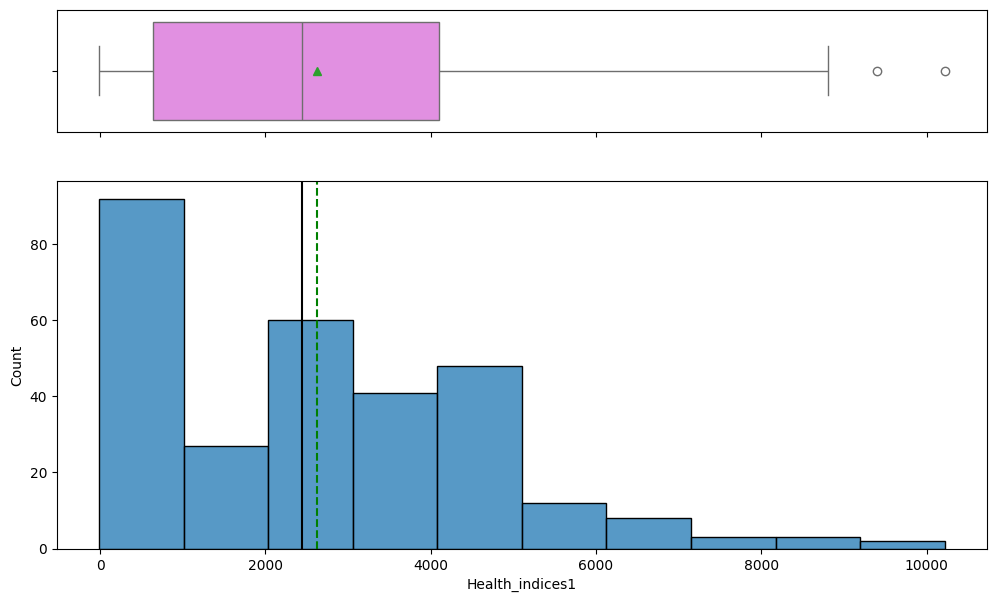

In [ ]:
 histogram_boxplot(df, 'Health_indices1', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Health_indices1 variable

**Observations**
- The distribution of health scores is right skewed, which indicates that a majority of the states have lower health scores, while a few states have significantly higher scores.
- The presence of outliers suggests that a few states have exceptionally high or low health scores compared to the rest. These outliers could be due to various factors such as:
      * unique healthcare policies or initiatives
      * Disparities in healthcare access or quality
      * demographic differences
      * data quality issues







#### `Health_indices2`

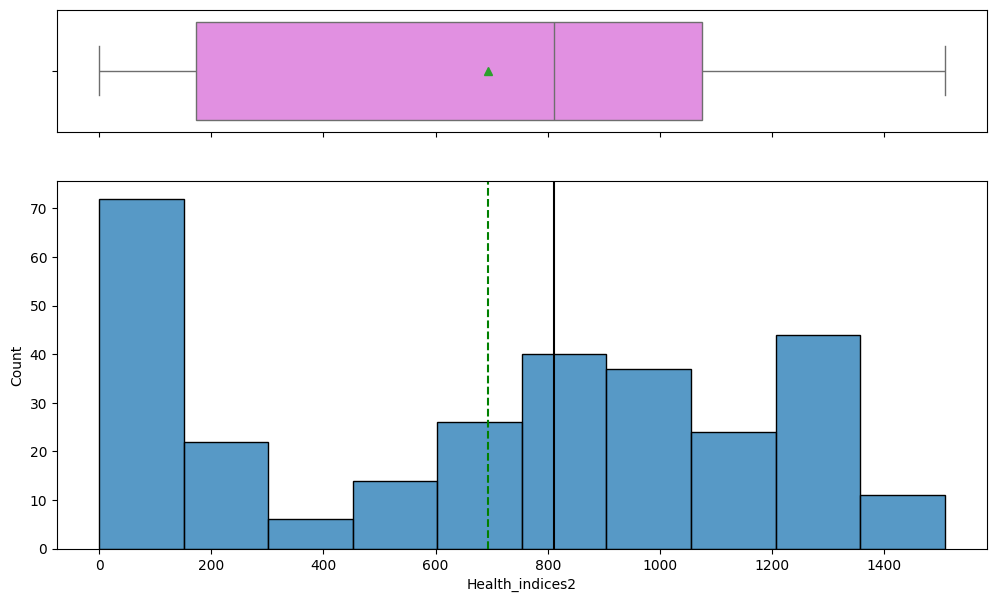

In [ ]:
 histogram_boxplot(df, 'Health_indices2', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Health_indices2 variable

**Observations**
- The distribution appear to be roughly symmetric, suggesting that the majority of areas have health score around the central value
- The outlier present in the box-plot suggest that a few  areas have significantly higher or lower health scores compared to the rest.


#### `Per Capita Income`

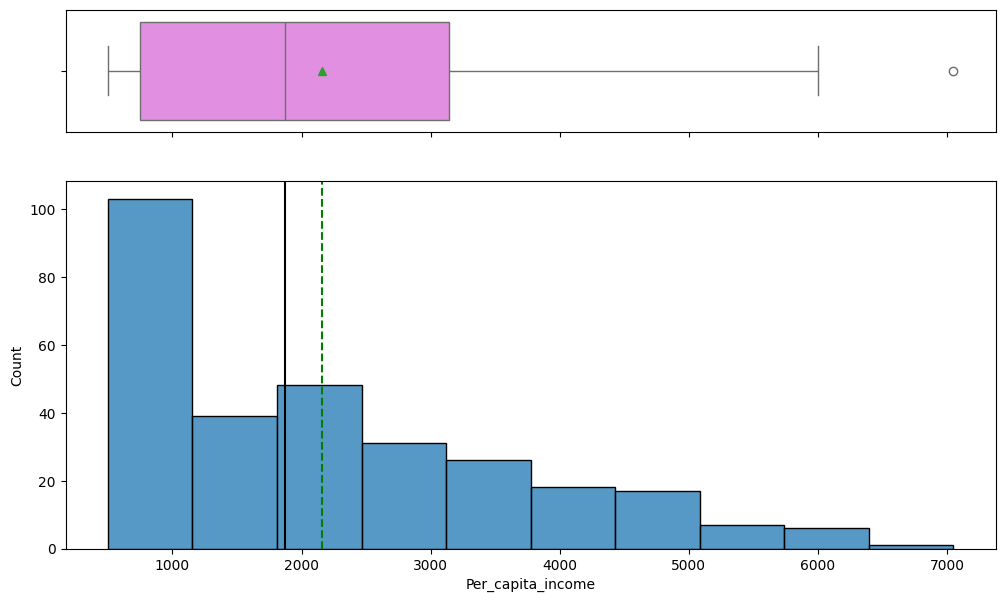

In [ ]:
 histogram_boxplot(df, 'Per_capita_income', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of Per_capita_income variable

**Observations**
- The distribution appears to be right-skewed, meaning there are more areas with lower PCI values  and fewer areas with higher PCI values.
- The presence of outliers indicates that a few areas have significantly higher PCI Compared to the rest. These could be due to factors like resource-rich regions or financial hubs.

#### `GDP`

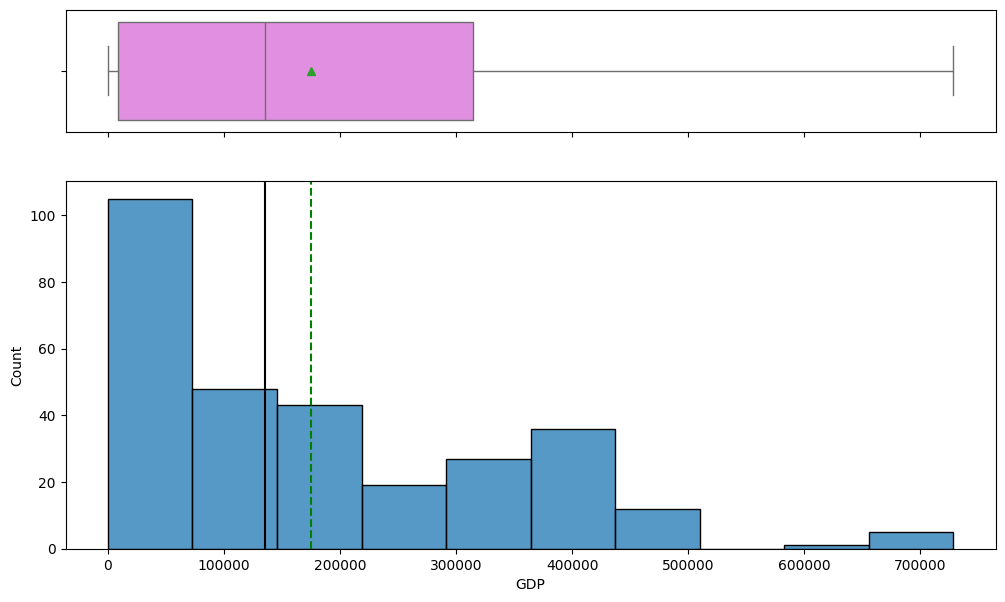

In [ ]:
 histogram_boxplot(df, 'GDP', figsize=(12, 7), kde=False, bins=None)      ## Complete the code to get the histogram and boxplot of GDP variable

**Observations**
- The distribution appears to be right-skewed, meaning there are more states with lower GDP values and fewer states with higher GDP values. This is a common pattern in global economic data.
- The presence of outliers indicates that a few states have significantly higher GDP compared to the rest.

#### `States`

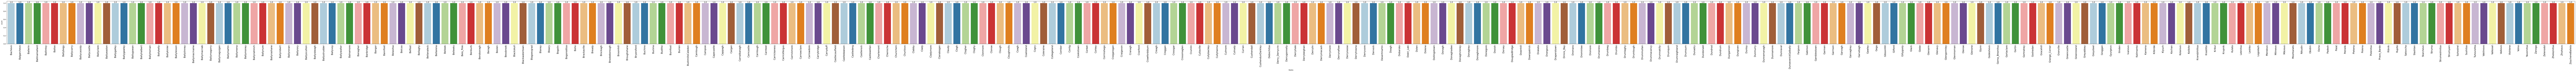

In [ ]:
labeled_barplot(df, 'States', perc=False, n=None)                             ## Complete the code to get the labeled barplot of States variable

**Observations**



#### Drop the variable

In [ ]:
df.drop(columns=["States"], inplace=True)                  ## Drop the States variable

### CDF plot

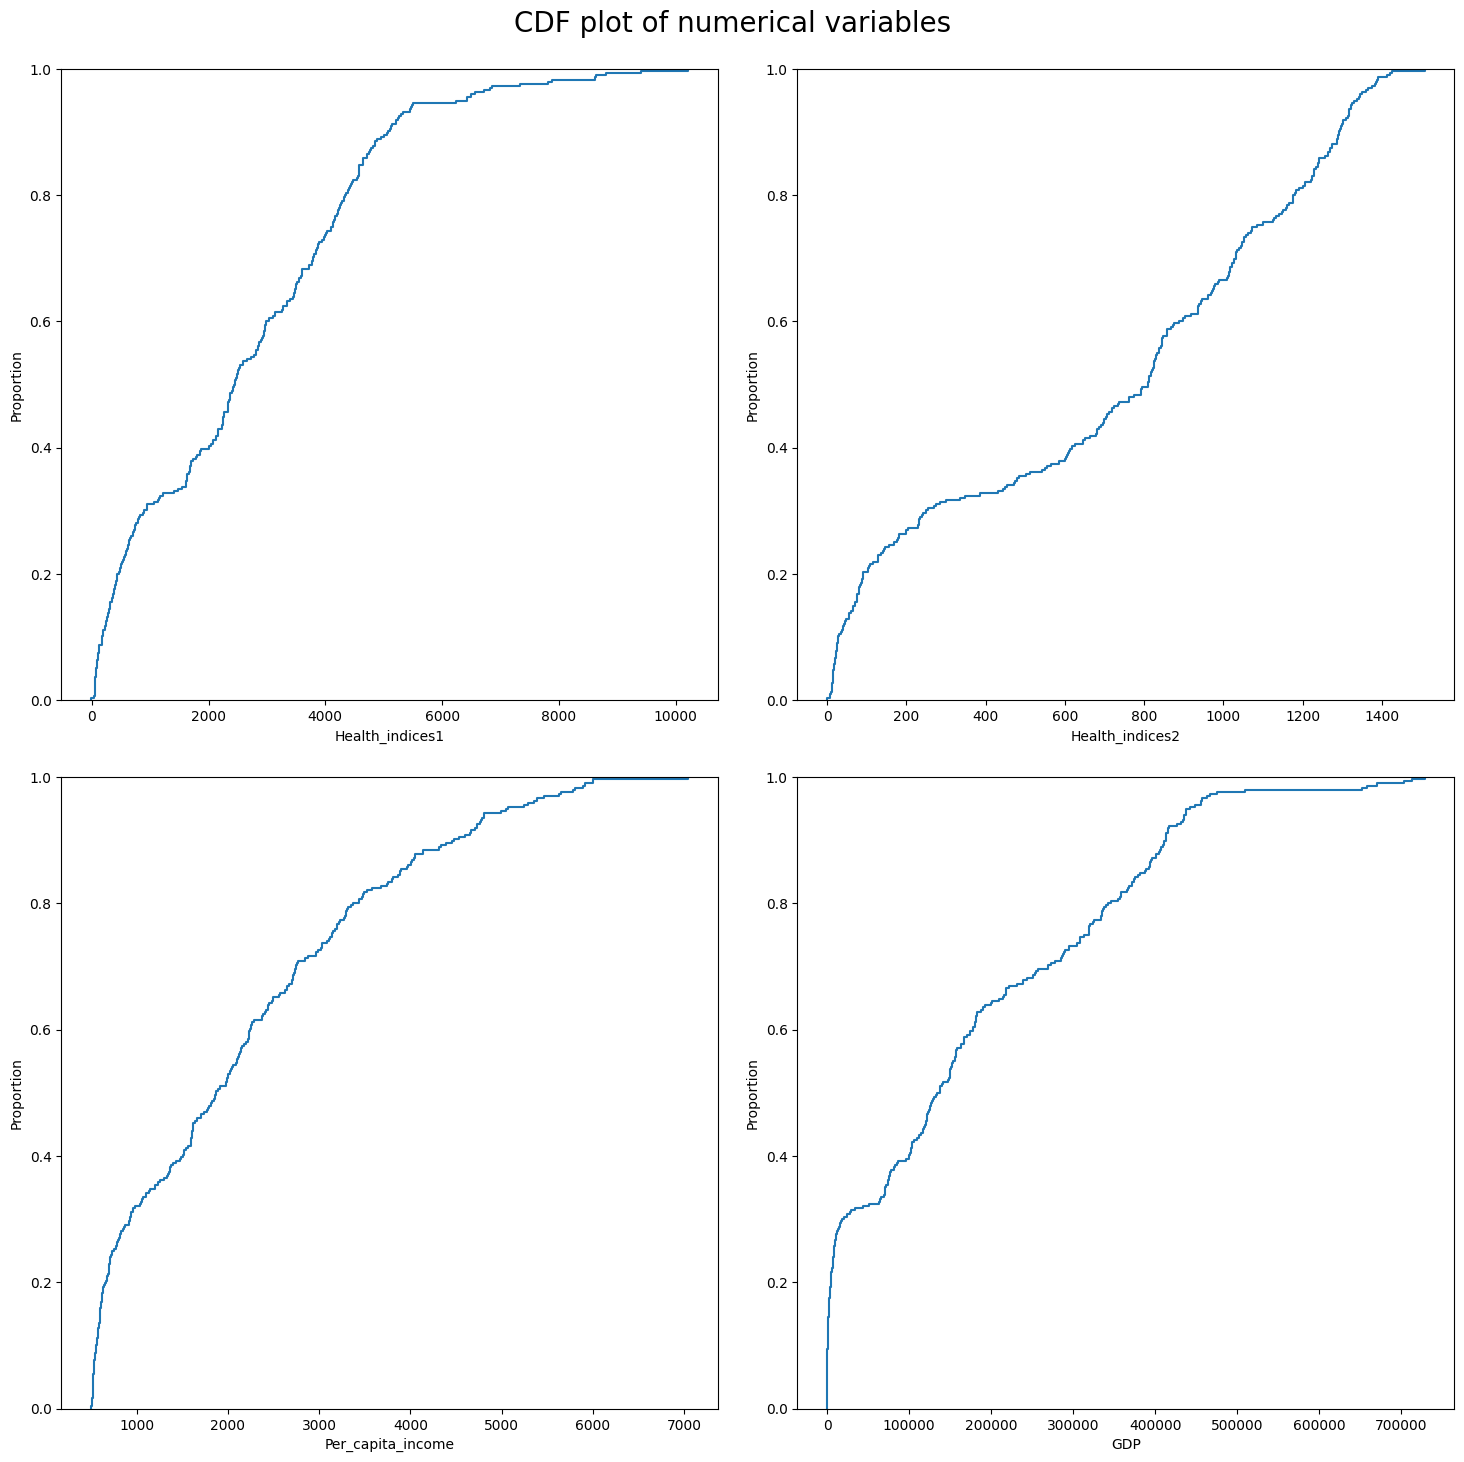

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0
column_names = df.columns.tolist()  # Get the list of column names

for ii in range(3):
    if counter < len(column_names):  # Check if the counter is within the list range
        sns.ecdfplot(data=df, ax=axes[ii][0], x=column_names[counter])
        counter += 1

    if counter < len(column_names):  # Check again before accessing the next column
        sns.ecdfplot(data=df, ax=axes[ii][1], x=column_names[counter])
        counter += 1

fig.tight_layout(pad=2.0)

**Observations**
1. Health_indices1:
   * The CDF plot shows a steep rise initially, indicating that a large portion of states have lower health index scores.
   * The curve then gradually flattens, suggesting a few states with significantly higher scores.
   * This confirms our earlier observation of a right-skewed distribution.

2. Health_indices2:
   * The CDF plot appears to be more evenly distributed compared to Health_indices1.
   * There's a gradual increase in the proportion of areas with higher scores, indicating a less skewed distribution.

3. Per Capita Income:
   * Similar to Health_indices1, the CDF plot for per capita income shows a right-skewed distribution.
   * A significant portion of areas have lower per capita incomes, and the curve flattens out gradually as we move towards higher income levels.

4. GDP:
   * The CDF plot for GDP exhibits a similar pattern to per capita income, with a right-skewed distribution.
   * This indicates that a few countries/states dominate the global economy, while the majority have lower GDP values.

### Bivariate Analysis

**Let's check for correlations.**

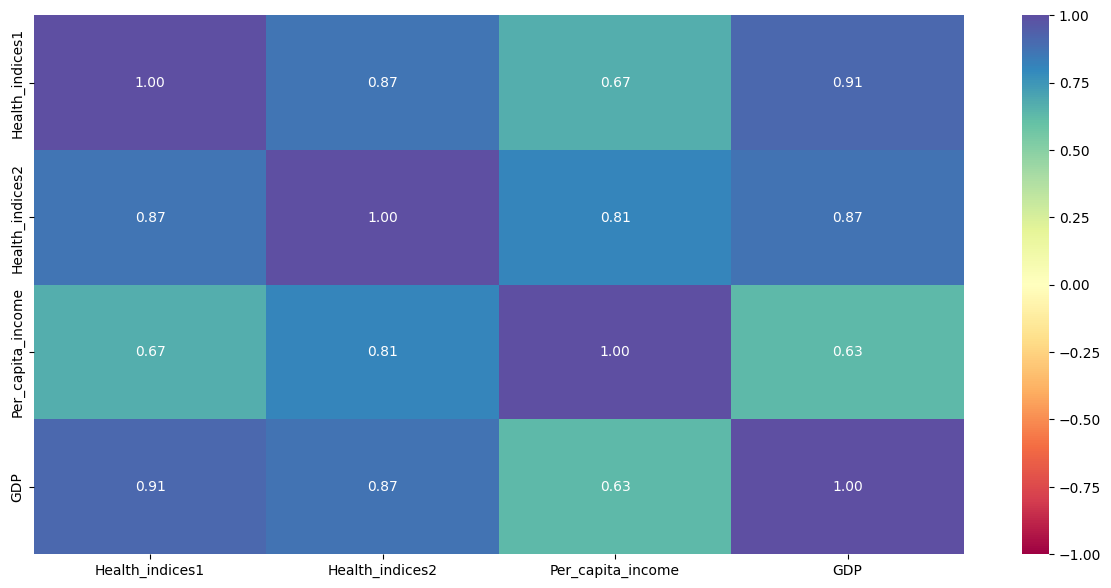

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
- The strong positive relation between health indices, GDP, and per capita income suggest that areas with higher economic development tend to have better health outcomes.
- The weak negative correlation between health_indices1 & per capita income warrants further investigation to understand the underlying factors.

**Pair plot**

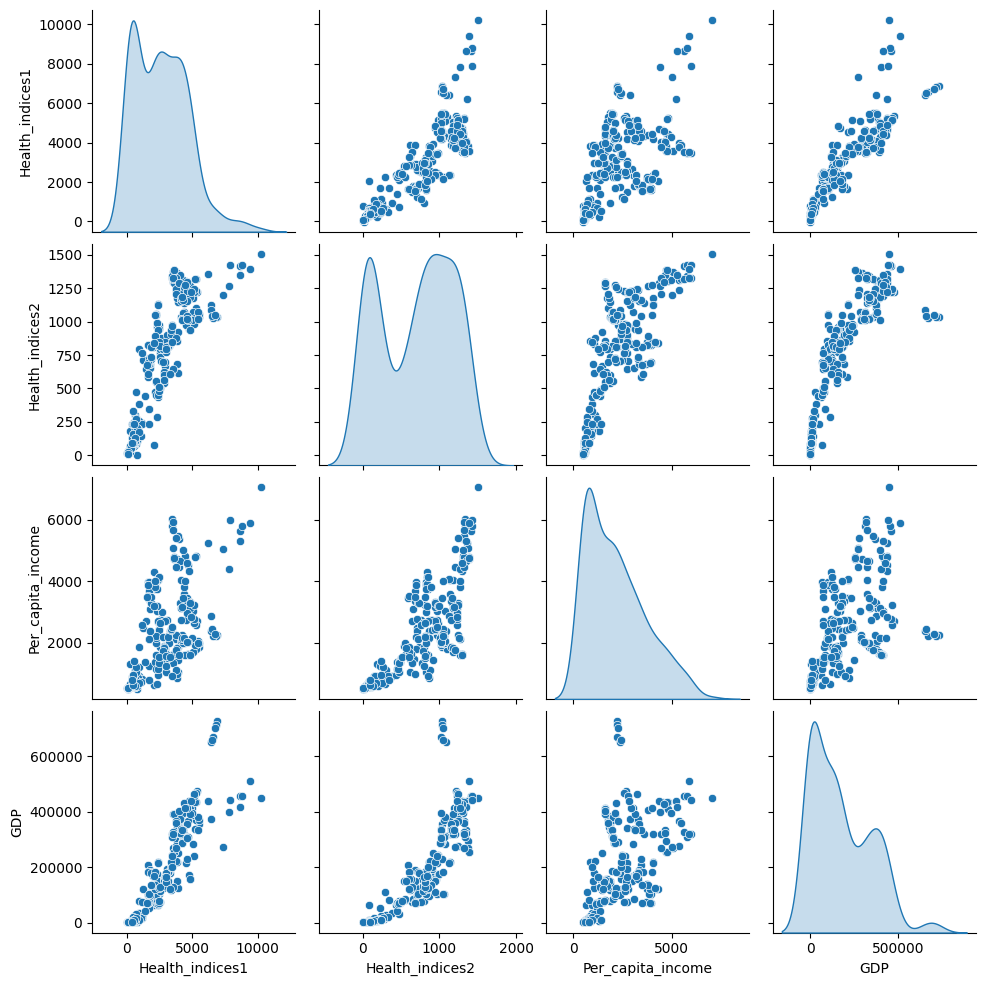

In [ ]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Observations**
* The pair plot reinforces the findings from the correlation matrix and the CDF plots.

* The strong positive relationships between health indices, GDP, and per capita income suggest that areas with higher economic development tend to have better health outcomes.

* The weak negative correlation between Health_indices1 and per capita income warrants further investigation to understand the underlying factors.


**We can add a hue and see if we can see some clustered distributions.**

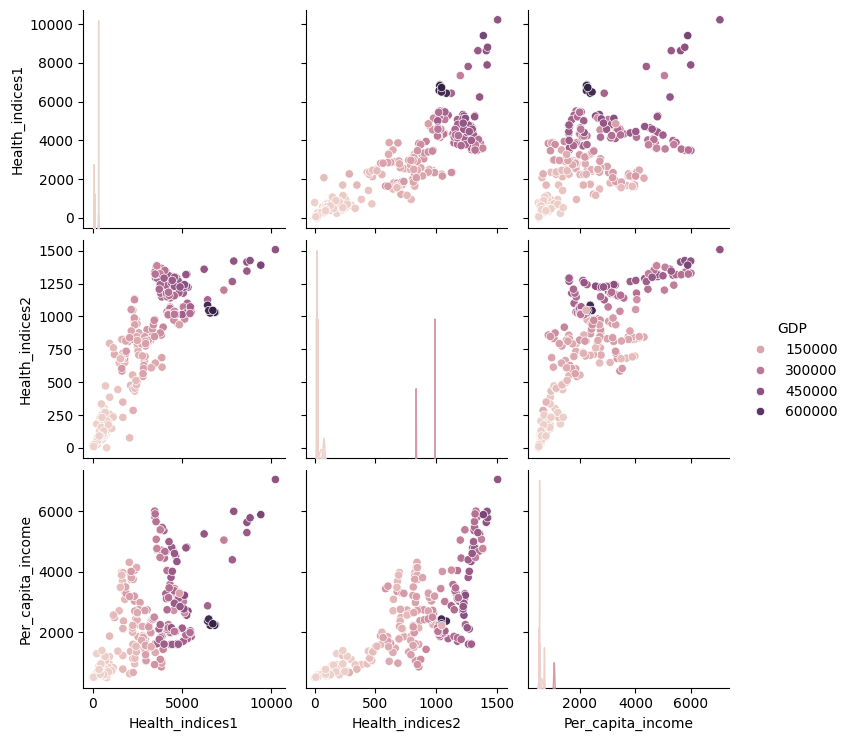

In [ ]:
sns.pairplot(
    data=df[
        [
            "Health_indices1",
            "Health_indices2",
            "Per_capita_income",
            "GDP",
        ]
    ],
    hue="GDP",
)

plt.show()

**Observations**
- Health_indices1 and Health_indices2: The positive correlation is still visible, but the clustering suggests that countries with similar GDP levels tend to have similar health indices in both categories.

- Health_indices1 and Per capita income: The weak negative trend is less apparent when considering GDP. It's possible that other factors, not captured by GDP, might influence this relationship.

- Health_indices1 and GDP: The strong positive correlation is evident, with clear clusters of countries at different GDP levels.

- Health_indices2 and Per capita income: The moderate positive correlation is still visible, but the clustering suggests that countries with similar GDP levels tend to have similar health indices and per capita incomes.

- Health_indices2 and GDP: The strong positive correlation is evident, with clear clusters of countries at different GDP levels.

- Per capita income and GDP: The very strong positive correlation is evident, with clear clusters of countries at different GDP levels.


**Let's visualize the modes of contacting the bank in a 3D plot.**

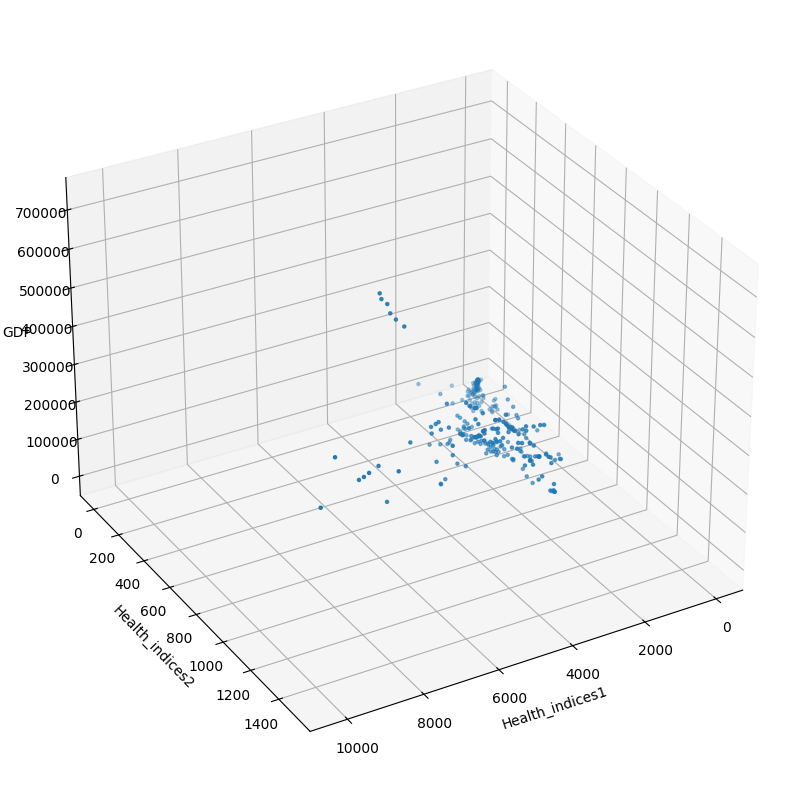

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Health_indices1"]
y = df["Health_indices2"]
z = df["GDP"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Health_indices1")
ax.set_ylabel("Health_indices2")
ax.set_zlabel("GDP")
ax.view_init(azim=60)
plt.show()

**Observations**
- The 3D plot shows a clear positive correlation between Health_indices1, Health_indices2, and GDP.

- Countries with higher health indices tend to have higher GDP.

- The data clusters suggest that countries with similar health and economic profiles group together.

- However, correlation doesn't imply causation. Other factors might influence these relationships.

- Further analysis is needed to establish causal links and understand the underlying mechanisms.

## Data Preprocessing

### Outlier Detection

- Let's find outliers in the data using z-score using the threshold you got in the above plot.

In [ ]:
threshold = 3          # 3 standard deviations
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Health_indices1 : [8802, 9403, 10219]

 Health_indices2 : []

 Per_capita_income : [7049]

 GDP : [703190, 713295, 728575]


**Observations**
- Health_indices1: The outliers in this column suggest that there are a few states or regions with exceptionally high health index scores compared to the majority. These states might have unique healthcare systems, policies, or socio-economic factors that contribute to their significantly higher health performance.

- Per_capita_income: The outlier in this column indicates a region with an exceptionally high per capita income compared to others. This could be due to factors such as resource-rich economies, high-income industries, or financial hubs.

- GDP: The outliers in GDP suggest that there are a few countries or regions with exceptionally high GDP compared to others. These could be major economic powers with significant global influence.

### Scaling

- Let's scale the data before we proceed with clustering.

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[['Health_indices1', 'Health_indices2', 'Per_capita_income', 'GDP']].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Hierarchical Clustering

In [ ]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [ ]:
# Calculate linkage using different methods
methods = ['single', 'complete', 'average', 'ward']
linkage_matrices = {}
for method in methods:
    linkage_matrix = linkage(df, method=method)                           ## Complete the code to apply different linkage on the data
    linkage_matrices[method] = linkage_matrix

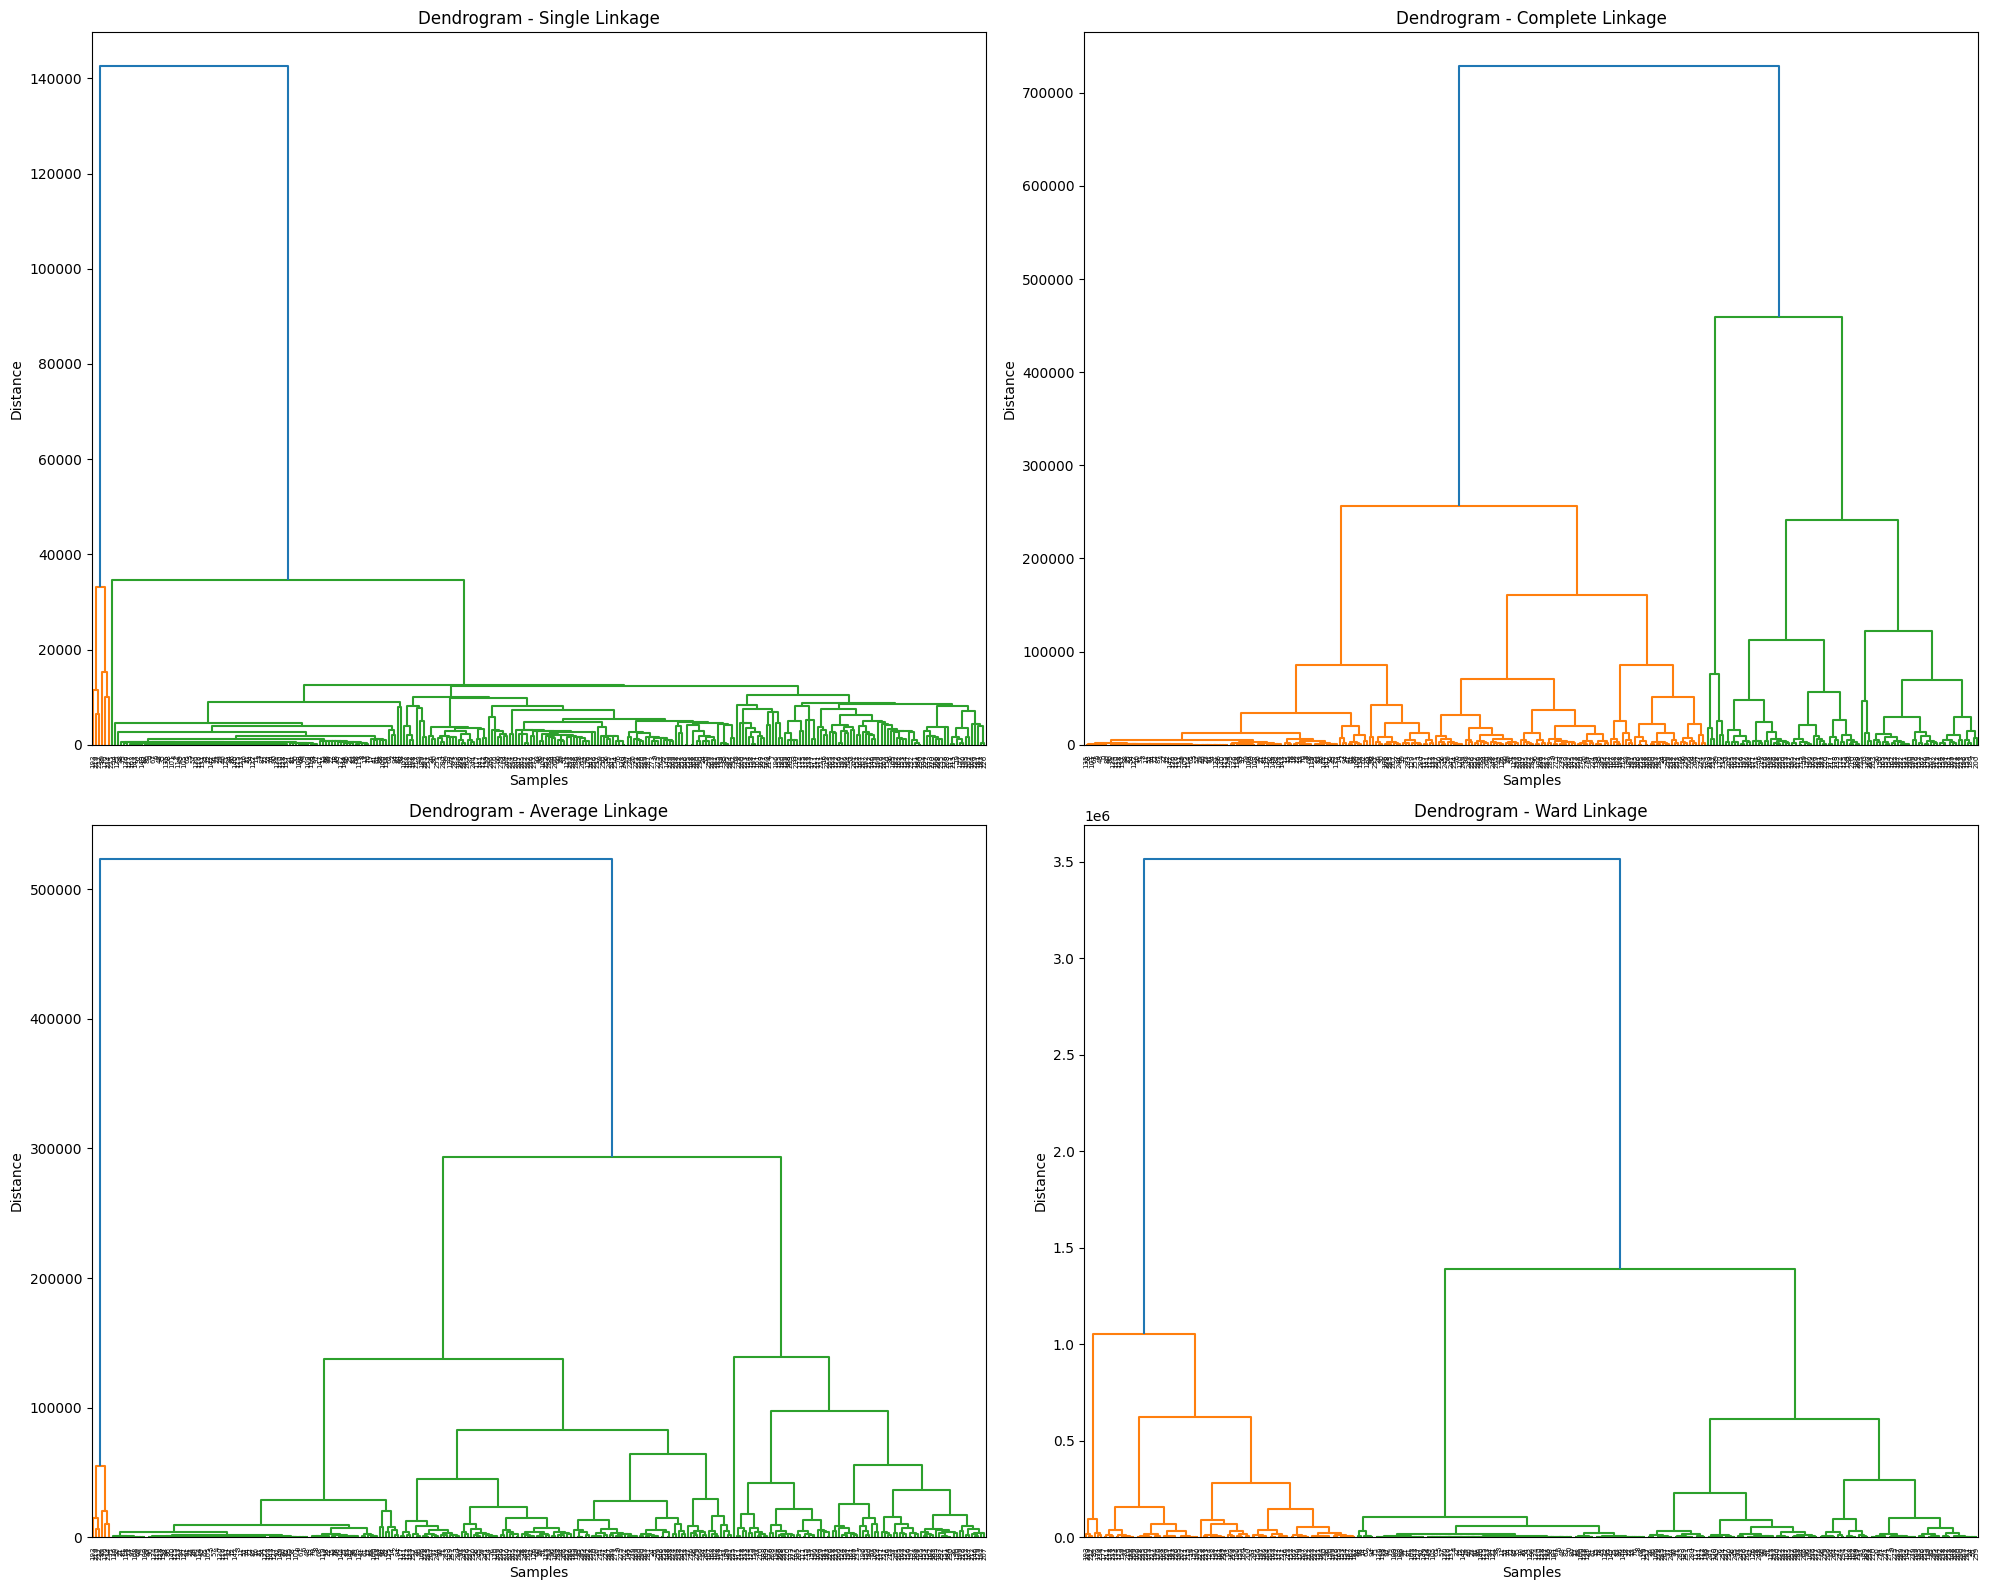

In [ ]:
plt.figure(figsize=(20, 16))
for method, linkage_matrix in linkage_matrices.items():
    plt.subplot(2, 2, methods.index(method) + 1)
    dendrogram(linkage_matrix, orientation='top')                                ## Complete the code to add linkage_matrix
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()

**Observations**
- Similarity between regions: Regions that are closer together in the dendrogram are more similar in terms of their health indices and economic indicators.

- Cluster Formation: The dendrogram shows how regions are grouped into clusters based on their similarity. Different linkage methods can result in different clustering patterns.

- Optimal Number of Clusters: By analyzing the dendrogram, we can determine the optimal number of clusters that best represents the underlying structure of the data. This can be done by looking for natural breaks in the dendrogram.

- Outliers: Outliers can be identified as regions that are far away from the main clusters. These outliers might have unique characteristics or data quality issues.

In [ ]:
linkage_matrix_ward = linkage(df, method='ward')                        ## Complete the code to apply to the best linkage you got from the above dendrogram
max_d = 7  # Maximum distance threshold for forming clusters
clusters = fcluster(linkage_matrix_ward, t=max_d, criterion='distance')              ## Complete the code to apply linkage_matrix_ward

num_clusters = len(np.unique(clusters))
print(f"Number of clusters determined using Ward linkage: {num_clusters}")

Number of clusters determined using Ward linkage: 292


#### Lets check silhouette score

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
hc_df = subset_scaled_df.copy()
sil_score_hc = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(hc_df, preds)
    sil_score_hc.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5005875144522923
For n_clusters = 3, silhouette score is 0.5260929381868132
For n_clusters = 4, silhouette score is 0.5374753668213341
For n_clusters = 5, silhouette score is 0.5136233841673663
For n_clusters = 6, silhouette score is 0.5251014259304009
For n_clusters = 7, silhouette score is 0.5475499898084455
For n_clusters = 8, silhouette score is 0.5214864942797744
For n_clusters = 9, silhouette score is 0.494016002953426


**From the above score, find the appropriate number of clusters to build the model**

### Creating final model

In [ ]:
%%time
HCmodel = AgglomerativeClustering(n_clusters=7, linkage="average")    ## Complete the code to add the appropriate number of clusters
HCmodel.fit(hc_df)

CPU times: user 6.13 ms, sys: 9 µs, total: 6.13 ms
Wall time: 5.81 ms


AgglomerativeClustering(linkage='average', n_clusters=7)

In [ ]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

## K-means Clustering

In [ ]:
k_means_df = subset_scaled_df.copy()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
wss =[]
a=[1,2,3,4,5,6,7,8,9,10]
sil_score= []
for i in a:
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(k_means_df)
    wss.append(KM.inertia_)

### Checking Elbow Plot

In [ ]:
#plt.figure(figsize=(12,8))
#sns.pointplot(a, wss)
#plt.title('Elbow Plot')
#plt.xlabel('Number of Clusters')
#plt.ylabel('WSS')

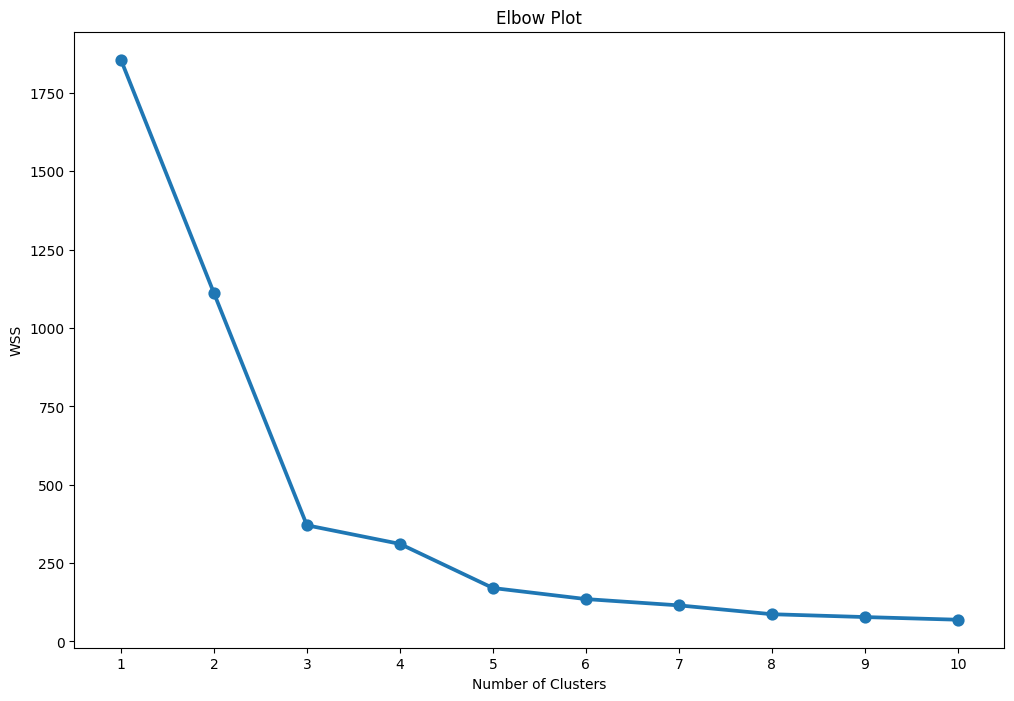

In [ ]:
# Create a DataFrame from 'a' and 'wss'
data = pd.DataFrame({'Number of Clusters': a, 'WSS': wss})

# Plot the data using sns.pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(data=data, x='Number of Clusters', y='WSS')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

plt.show()

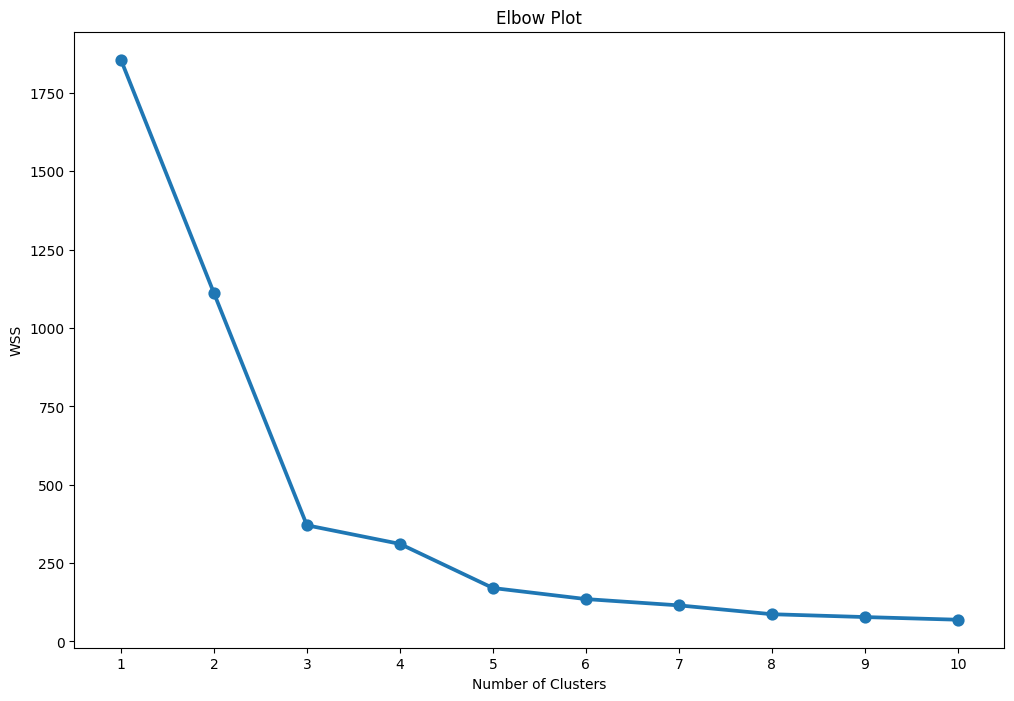

In [ ]:
# Create a DataFrame from 'a' and 'wss'
data = pd.DataFrame({'Number of Clusters': a, 'WSS': wss})

# Plot the data using sns.pointplot
plt.figure(figsize=(12, 8))
sns.pointplot(data=data, x='Number of Clusters', y='WSS')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')

plt.show()

### Checking Silhouette Scores

In [ ]:
ss={1:0}
for i in range(2, 11):
 clusterer = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)                 ## Complete the code to apply KMeans
 y=clusterer.fit_predict(hc_df)                                                          ## Complete the code to predict on k_means_df
 s =silhouette_score(hc_df, y )                                                          ## Complete the code to get the silhouette score of k_means_df
 ss[i]=round(s,5)
 print("The Average Silhouette Score for {} clusters is {}".format(i,round(s,5)))

The Average Silhouette Score for 2 clusters is 0.48288
The Average Silhouette Score for 3 clusters is 0.64606
The Average Silhouette Score for 4 clusters is 0.62613
The Average Silhouette Score for 5 clusters is 0.65508
The Average Silhouette Score for 6 clusters is 0.66385
The Average Silhouette Score for 7 clusters is 0.62085
The Average Silhouette Score for 8 clusters is 0.58191
The Average Silhouette Score for 9 clusters is 0.53792
The Average Silhouette Score for 10 clusters is 0.52328


**From the silhouette scores, find which k value has highest value and have elbow in elbow curve.**

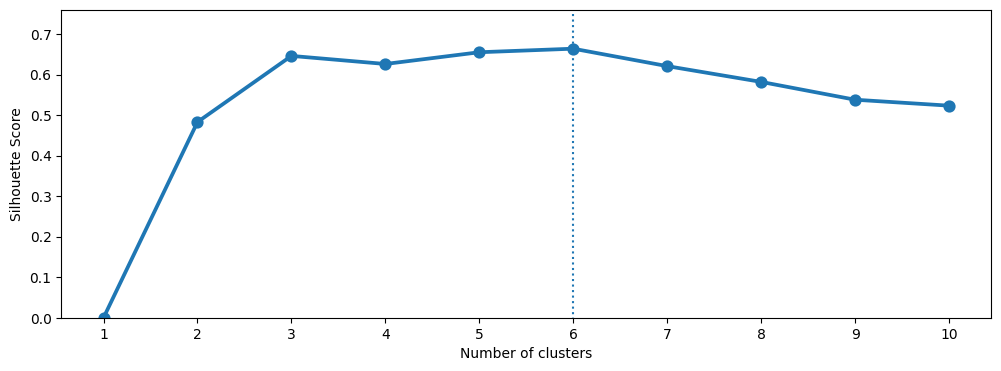

In [ ]:
# Create a DataFrame from the dictionary
data_df = pd.DataFrame(list(ss.items()), columns=['Number of clusters', 'Silhouette Score'])

# Plot the data using sns.pointplot
maxkey = data_df['Silhouette Score'].idxmax() + 2  # Find the key with the maximum Silhouette Score
fig, ax = plt.subplots(figsize=(12, 4))
sns.pointplot(data=data_df, x='Number of clusters', y='Silhouette Score') # x is now 'Number of clusters'
plt.vlines(x=maxkey - 2, ymax=0, ymin=0.75, linestyles='dotted')
ax.set(ylim=(0, 0.76))
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6 , init = 'k-means++', random_state = 1)          ## Complete the code apply KMeans with appropriate number of clusters which you got from above plots

kmeans.fit_predict(hc_df)                                                         ## Complete the code to predict the KMeans on k_means_df

array([0, 4, 0, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 0,
       0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 4, 0, 0, 4, 4,
       4, 0, 0, 1, 0, 0, 0, 4, 0, 1, 0, 4, 4, 0, 0, 4, 4, 0, 0, 1, 4, 0,
       4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 4, 0, 4, 4, 0, 0,
       0, 2, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 1, 0, 4, 0, 2, 1, 1, 1,
       1, 5, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 5, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 2, 1, 1,
       2, 2, 5, 1, 2, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3,
       1, 1, 3, 1, 1, 5, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_
df1["K_means_segments"] = kmeans.labels_

In [ ]:
df1.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,K_means_segments
0,417,66,564,1823,2,0
1,1485,646,2710,73662,0,4
2,654,299,1104,27318,2,0
3,192,25,573,250,2,0
4,43,8,528,22,2,0


### Cluster Profiling

In [ ]:
df1.K_means_segments.value_counts()                  ## Find the value_counts of each of the K_means_segments

,count
K_means_segments,
0,109
4,88
1,57
2,30
5,6
3,6


In [ ]:
df1.head()

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,K_means_segments
0,417,66,564,1823,2,0
1,1485,646,2710,73662,0,4
2,654,299,1104,27318,2,0
3,192,25,573,250,2,0
4,43,8,528,22,2,0


In [ ]:
clust_profile=df1
clust_profile=clust_profile.groupby('K_means_segments').mean()
clust_profile['freq']=df1.K_means_segments.value_counts().sort_index()
np.round(clust_profile,2).T

K_means_segments,0,1,2,3,4,5
Health_indices1,634.53,4601.11,4390.20,6649.33,2518.72,8927.67
Health_indices2,144.61,1138.98,1309.13,1044.00,802.02,1417.17
Per_capita_income,751.98,2432.37,4868.47,2299.83,2535.64,5940.17
GDP,14274.23,350721.54,349669.43,687649.67,145730.01,454834.33
HC_Clusters,2.00,1.00,5.07,3.00,0.00,4.00
freq,109.00,57.00,30.00,6.00,88.00,6.00


**Observations**

The table shows clusters of states with similar health and economic indicators.

Cluster 0: Low health indices, per capita income, and GDP.

Cluster 1: High health indices, per capita income, and GDP.

Clusters 2, 3, 4, and 5: Intermediate levels of health and economic indicators.

## Cluster Profiling and Comparison

### Cluster Profiling: K-means Clustering

In [ ]:
km_cluster_profile = df1.groupby("K_means_segments").mean()        ## Complete the code to group the data using K_means_segments

In [ ]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("K_means_segments")["Per_capita_income"].count().values
)

In [ ]:
km_cluster_profile

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,
0,634.532110,144.614679,751.981651,14274.229358,2.000000,109
1,4601.105263,1138.982456,2432.368421,350721.543860,1.000000,57
2,4390.200000,1309.133333,4868.466667,349669.433333,5.066667,30
3,6649.333333,1044.000000,2299.833333,687649.666667,3.000000,6
4,2518.715909,802.022727,2535.636364,145730.011364,0.000000,88
5,8927.666667,1417.166667,5940.166667,454834.333333,4.000000,6


**Observations**
- K-Means Clustering: Applied K-Means clustering to group states based on health and economic indicators.

- Cluster Identification: Identified 6 distinct clusters with varying levels of health and economic development.

- Cluster Characteristics:

   * Cluster 0: Low-performing states with poor health and economic indicators.

   * Cluster 1: High-performing states with strong health and economic indicators.

   * Clusters 2-5: Intermediate states with varying levels of development.

- Actionable Insights:

   * Targeted Interventions: Implement specific policies and programs for each cluster.

   * Resource Allocation: Allocate resources based on the needs of each cluster.

   * Policy Formulation: Develop policies that address the unique challenges of each cluster.

### Cluster Profiling: Hierarchical Clustering

In [ ]:
hc_cluster_profile = df2.groupby("HC_segments").mean()         ## Complete the code to group the data using K_means_segments

In [ ]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Per_capita_income"].count().values
)

In [ ]:
hc_cluster_profile

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
HC_segments,,,,,
0,2518.715909,802.022727,2535.636364,145730.011364,88
1,4601.105263,1138.982456,2432.368421,350721.543860,57
2,634.532110,144.614679,751.981651,14274.229358,109
3,6649.333333,1044.000000,2299.833333,687649.666667,6
4,8927.666667,1417.166667,5940.166667,454834.333333,6
5,4162.750000,1314.607143,4879.035714,350573.285714,28
6,7574.500000,1232.500000,4720.500000,337015.500000,2


**Observations**
- Cluster Identification: Identified 7 distinct clusters based on health and economic indicators.

- Cluster Characteristics:

   * Cluster 0: Low-performing states with poor health and economic indicators.

   * Cluster 1: High-performing states with strong health and economic indicators.

   * Clusters 2-6: Intermediate states with varying levels of development.

- Actionable Insights:

   * Targeted Interventions: Prioritize low-performing clusters.

   * Policy Formulation: Tailor policies to specific cluster needs.

   * Resource Allocation: Allocate resources based on cluster priorities.

### K-means vs Hierarchical Clustering

In [ ]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Health_indices1,Health_indices2,Per_capita_income,GDP,HC_Clusters,count_in_each_segment
K_means_segments,,,,,,
0,634.532110,144.614679,751.981651,14274.229358,2.000000,109
1,4601.105263,1138.982456,2432.368421,350721.543860,1.000000,57
2,4390.200000,1309.133333,4868.466667,349669.433333,5.066667,30
3,6649.333333,1044.000000,2299.833333,687649.666667,3.000000,6
4,2518.715909,802.022727,2535.636364,145730.011364,0.000000,88
5,8927.666667,1417.166667,5940.166667,454834.333333,4.000000,6


In [ ]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Health_indices1,Health_indices2,Per_capita_income,GDP,count_in_each_segment
HC_segments,,,,,
0,2518.715909,802.022727,2535.636364,145730.011364,88
1,4601.105263,1138.982456,2432.368421,350721.543860,57
2,634.532110,144.614679,751.981651,14274.229358,109
3,6649.333333,1044.000000,2299.833333,687649.666667,6
4,8927.666667,1417.166667,5940.166667,454834.333333,6
5,4162.750000,1314.607143,4879.035714,350573.285714,28
6,7574.500000,1232.500000,4720.500000,337015.500000,2


<Axes: xlabel='K_means_segments'>

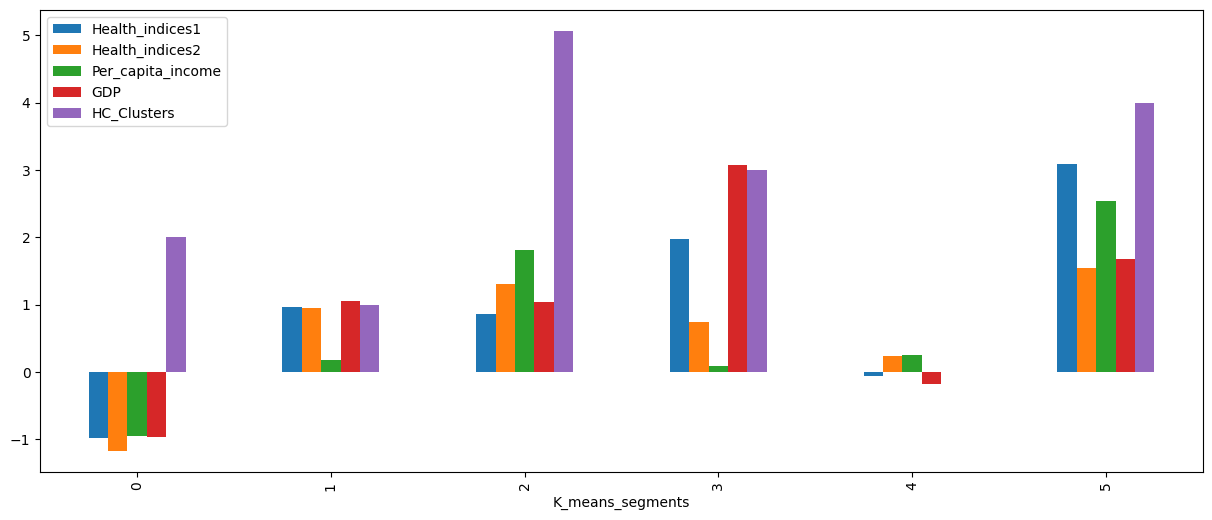

In [ ]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_segments'>

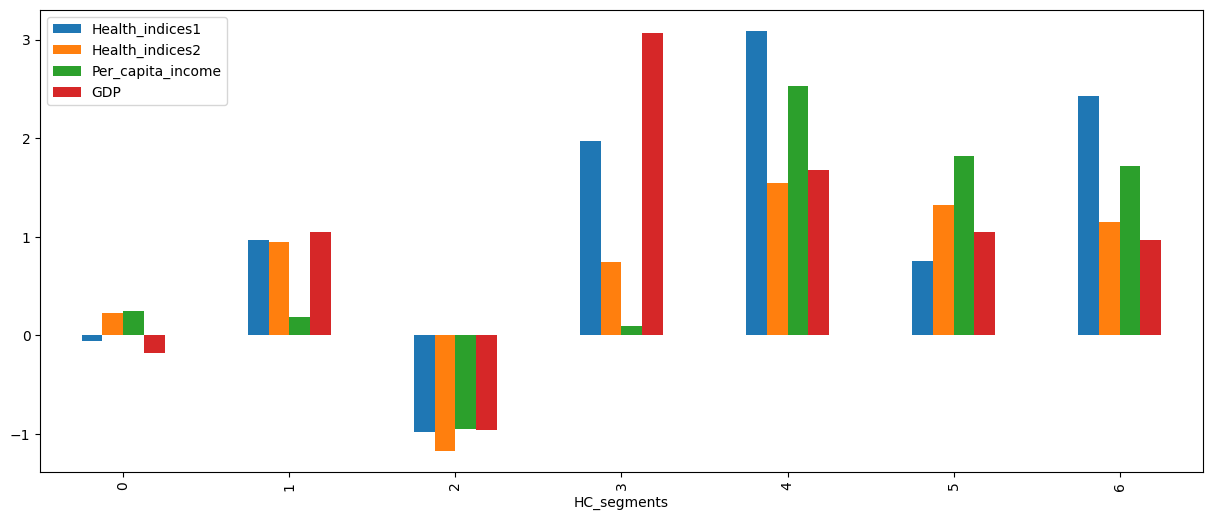

In [ ]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

**Observations**

**Let's create some plots on the original data to understand the customer distribution among the clusters.**

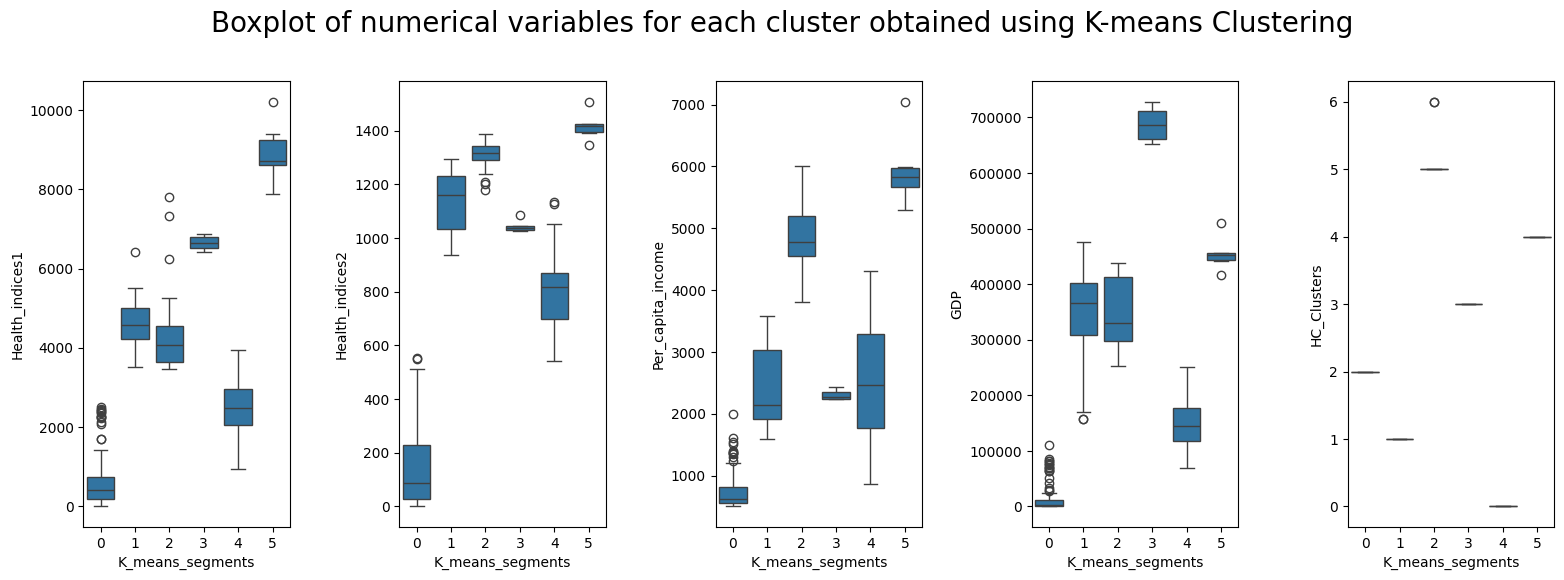

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df1[df1.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

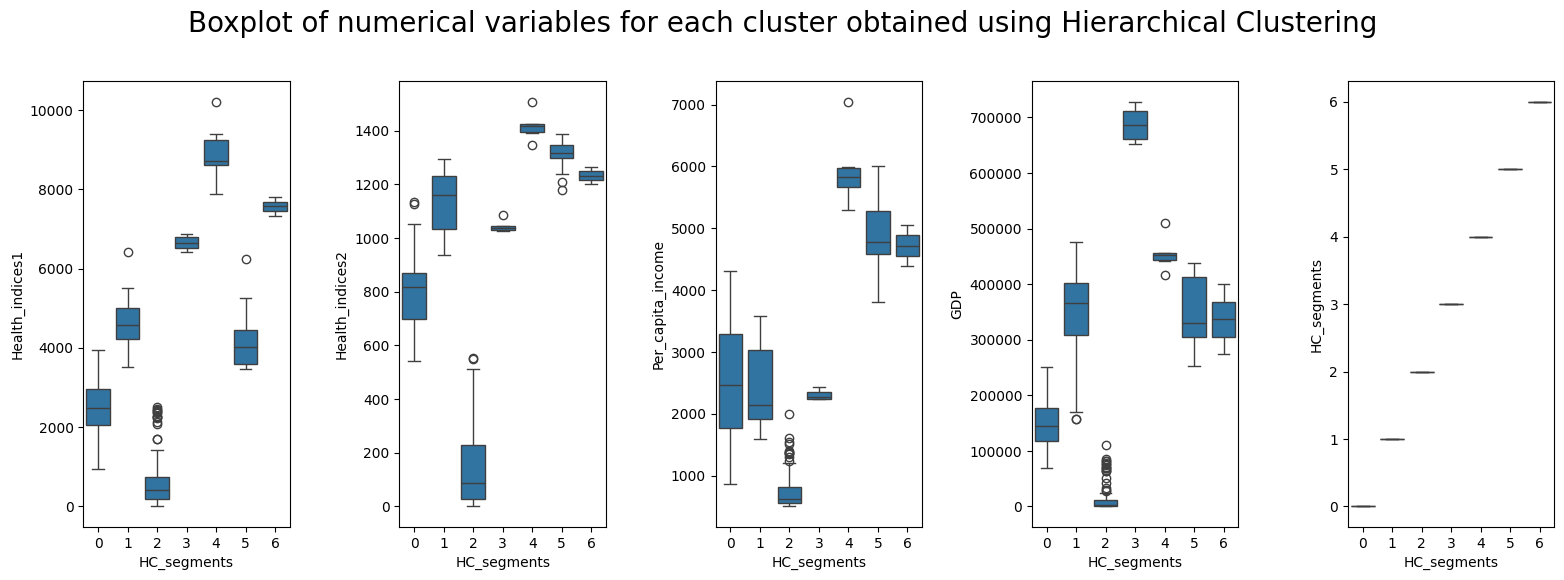

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df2[df2.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Actionable Insights and Recommendations

### Cluster Comparison

**Observations**



### Insights




### Business Recommendations



# PCA

## Problem Statement

### Context

The ‘Hair Salon.csv’ dataset contains various variables used for the context of Market Segmentation. This particular case study is based on various parameters of a salon chain of hair products. You are expected to do Principal Component Analysis for this case study according to the instructions given in the rubric.


### Objective

Apply Principal Component Analysis (PCA) on the 'Hair Salon.csv' dataset, which encompasses various variables related to a salon chain's market segmentation. The goal is to analyze and interpret the principal components


###  Data Description

1. ProdQual: Product Quality
2. Ecom: E-Commerce
3. TechSup: Technical Support
4. CompRes: Complaint Resolution
5. Advertising: Advertising
6. ProdLine: Product Line
7. SalesFImage: Salesforce Image
8. ComPricing: Competitive Pricing
9. WartyClaim: Warranty & Claims
10. OrdBilling: Order & Billing
11. DelSpeed: Delivery Speed
12. Satisfaction: Customer Satisfaction

## Loading the dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Great Learning/Dataset2/Factor-Hair-Revised.csv')    ## Complete the code to read the dataset

In [ ]:
data.head()               ## Complete the code to check the head

,ID,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed,Satisfaction
0,1,8.5,3.9,2.5,5.9,4.8,4.9,6.0,6.8,4.7,5.0,3.7,8.2
1,2,8.2,2.7,5.1,7.2,3.4,7.9,3.1,5.3,5.5,3.9,4.9,5.7
2,3,9.2,3.4,5.6,5.6,5.4,7.4,5.8,4.5,6.2,5.4,4.5,8.9
3,4,6.4,3.3,7.0,3.7,4.7,4.7,4.5,8.8,7.0,4.3,3.0,4.8
4,5,9.0,3.4,5.2,4.6,2.2,6.0,4.5,6.8,6.1,4.5,3.5,7.1


In [ ]:
data.drop(['ID','Satisfaction'],axis=1, inplace = True)     ## Complete the code to drop the ID and Satisfaction columns

## Exploratory Data Analysis

### Univariate Analysis

#### `ProdQual`

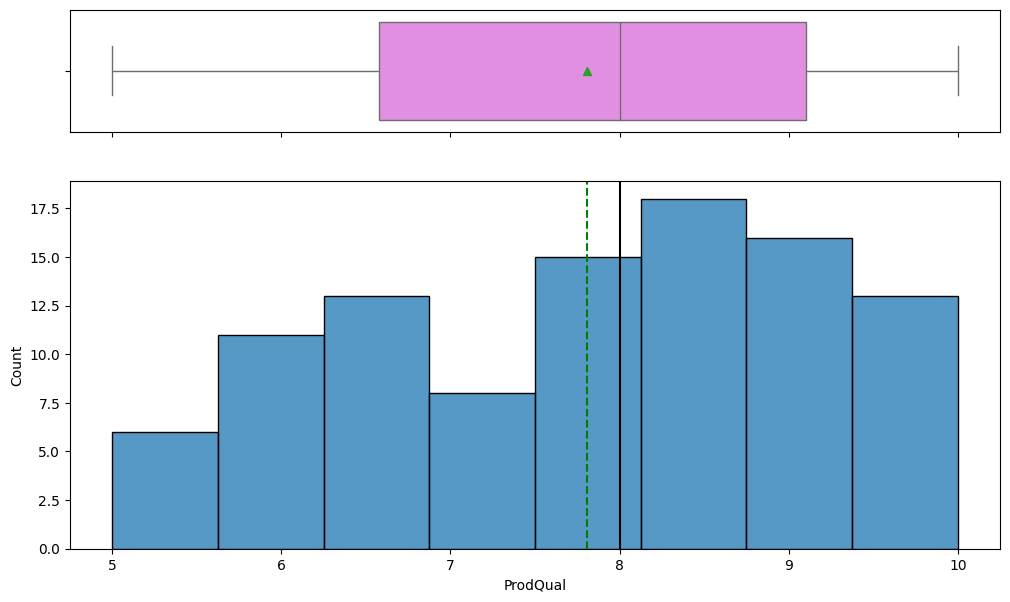

In [ ]:
histogram_boxplot(data, 'ProdQual', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ProdQual

#### `Ecom`

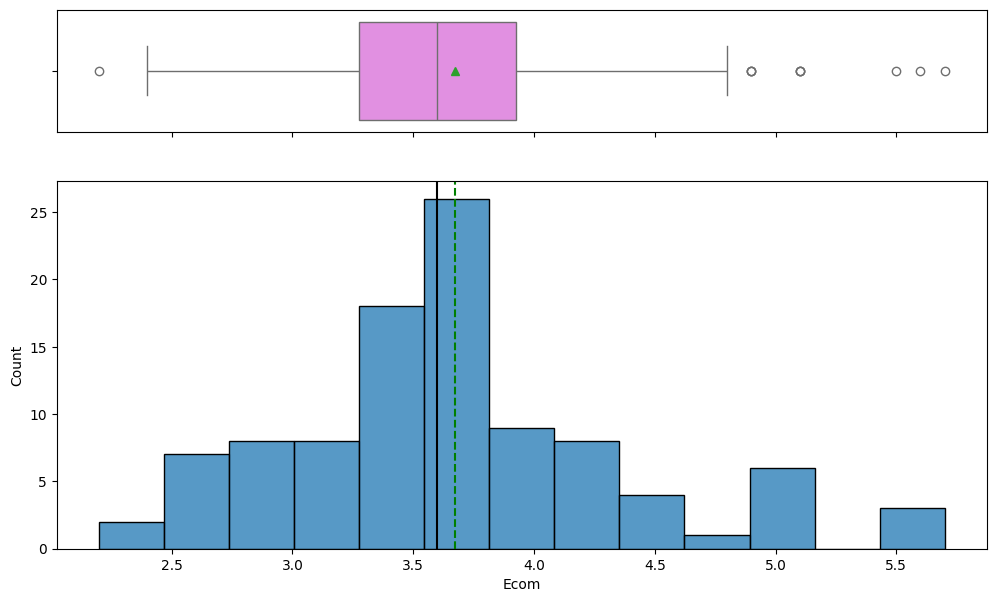

In [ ]:
histogram_boxplot(data, 'Ecom', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for Ecom

#### `TechSup`

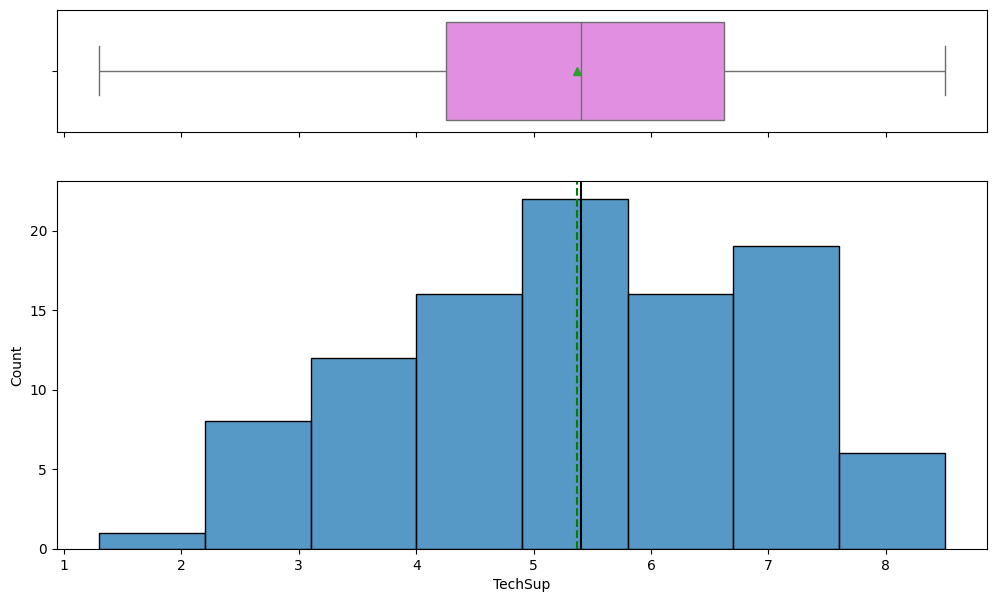

In [ ]:
histogram_boxplot(data, 'TechSup', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for TechSup

#### `CompRes`

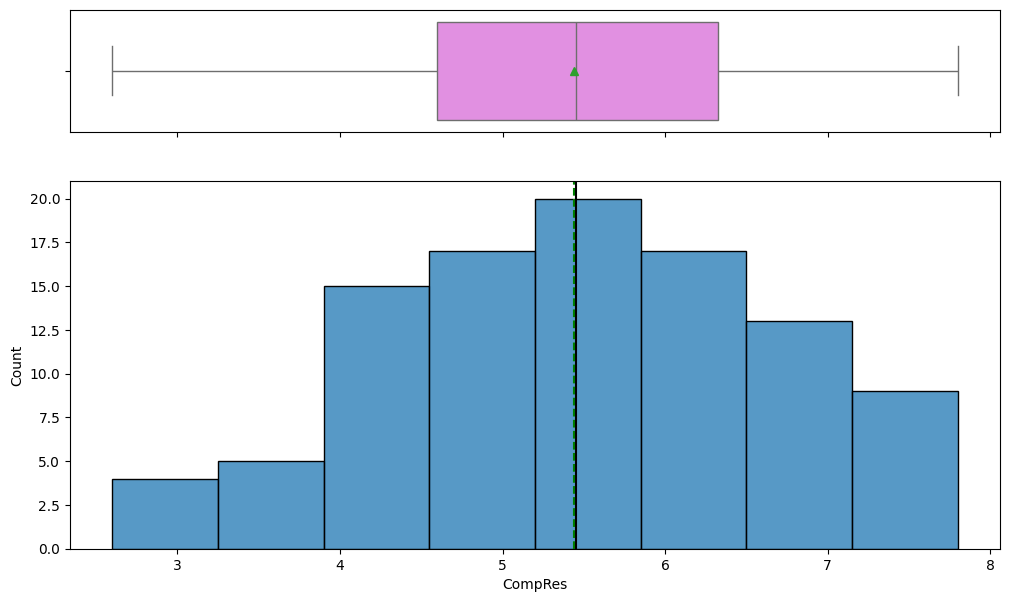

In [ ]:
histogram_boxplot(data, 'CompRes', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for CompRes

#### `Advertising`

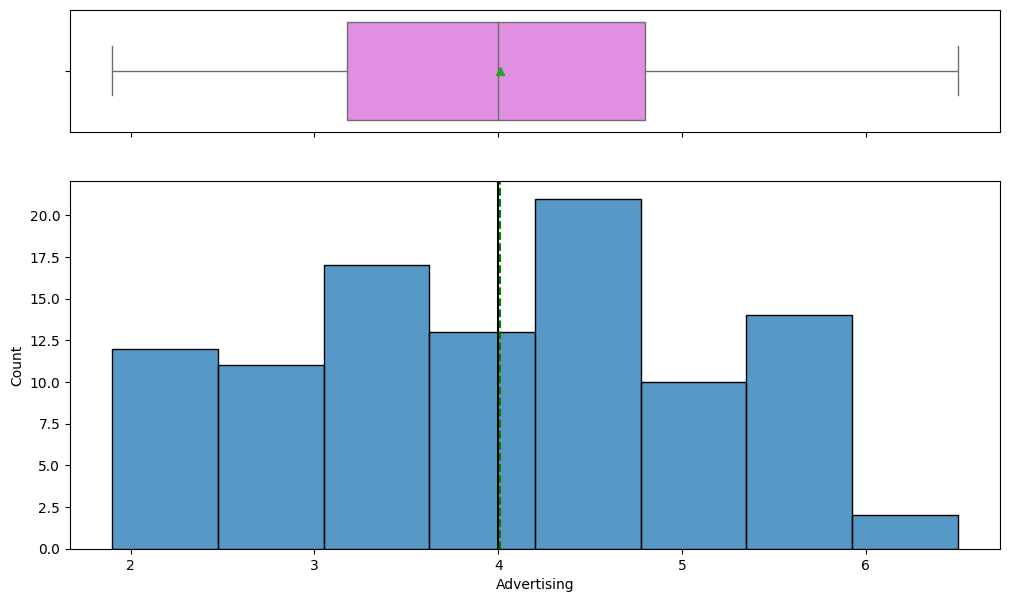

In [ ]:
histogram_boxplot(data, 'Advertising', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for Advertising

#### `ProdLine`

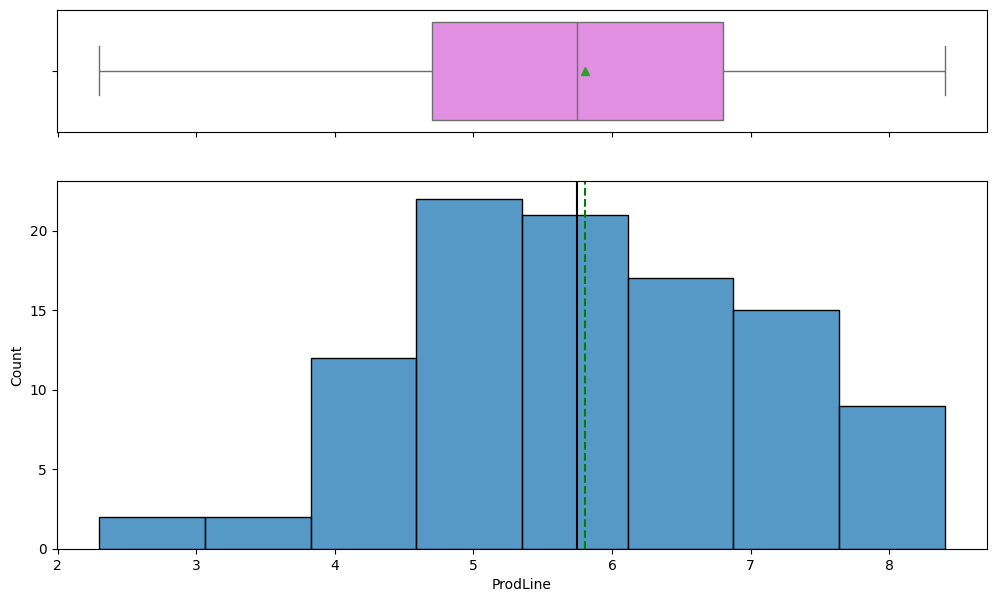

In [ ]:
histogram_boxplot(data, 'ProdLine', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ProdLine

#### `SalesFImage`

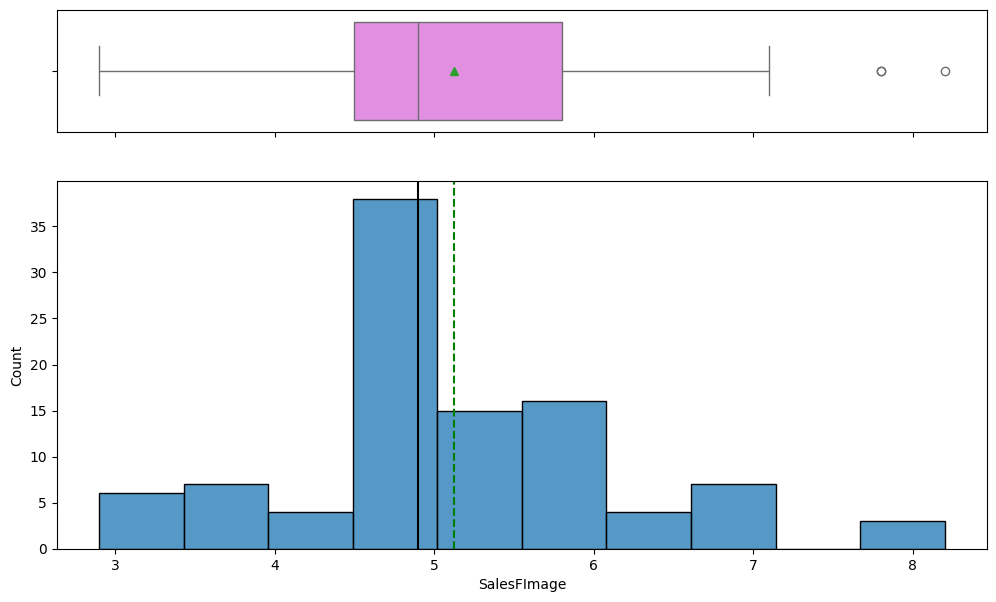

In [ ]:
histogram_boxplot(data, 'SalesFImage', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for SalesFImage

#### `ComPricing`

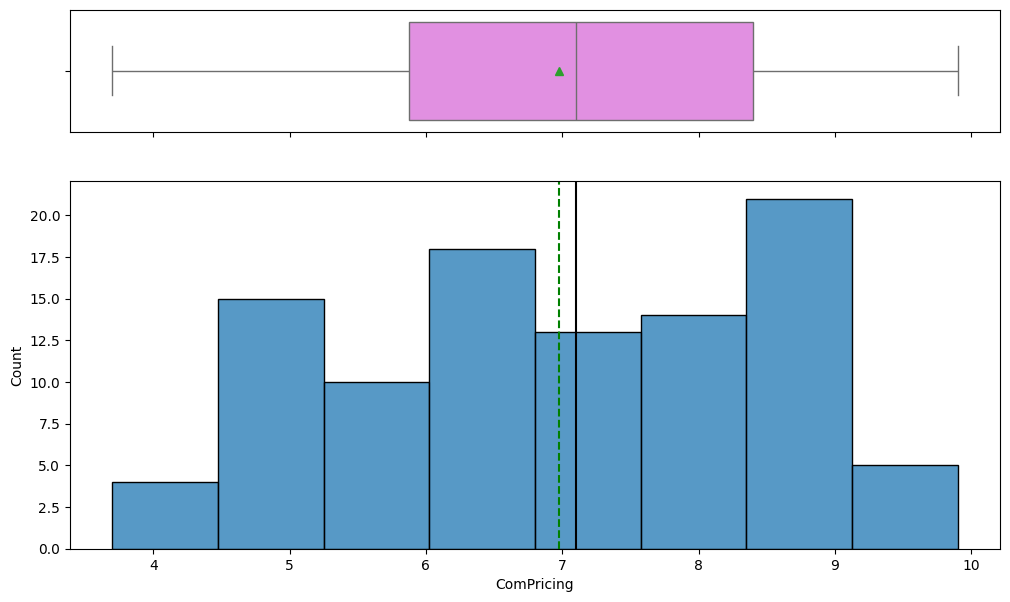

In [ ]:
histogram_boxplot(data, 'ComPricing', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for ComPricing

#### `WartyClaim`

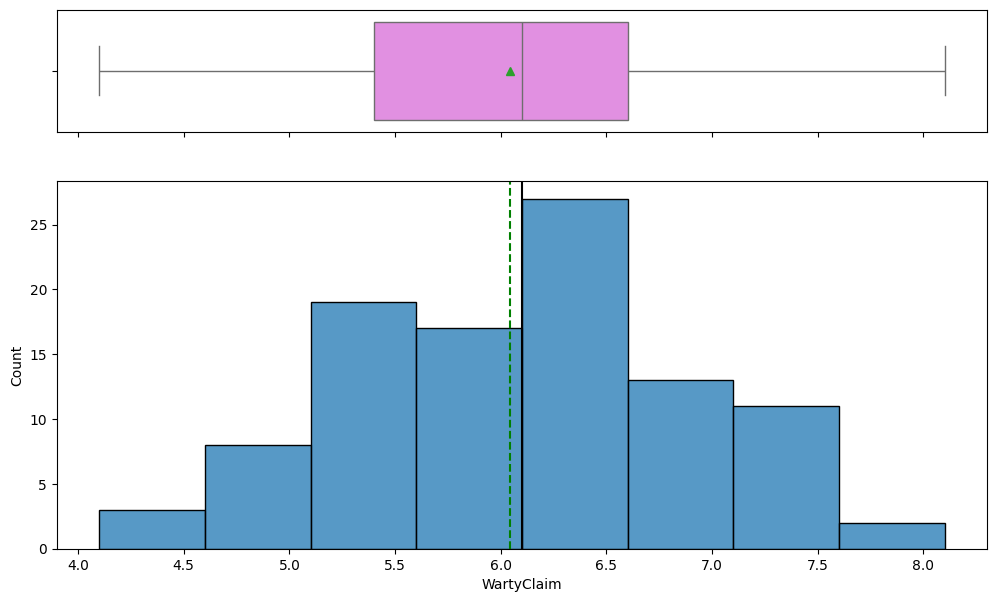

In [ ]:
histogram_boxplot(data, 'WartyClaim', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for WartyClaim

#### `OrdBilling`

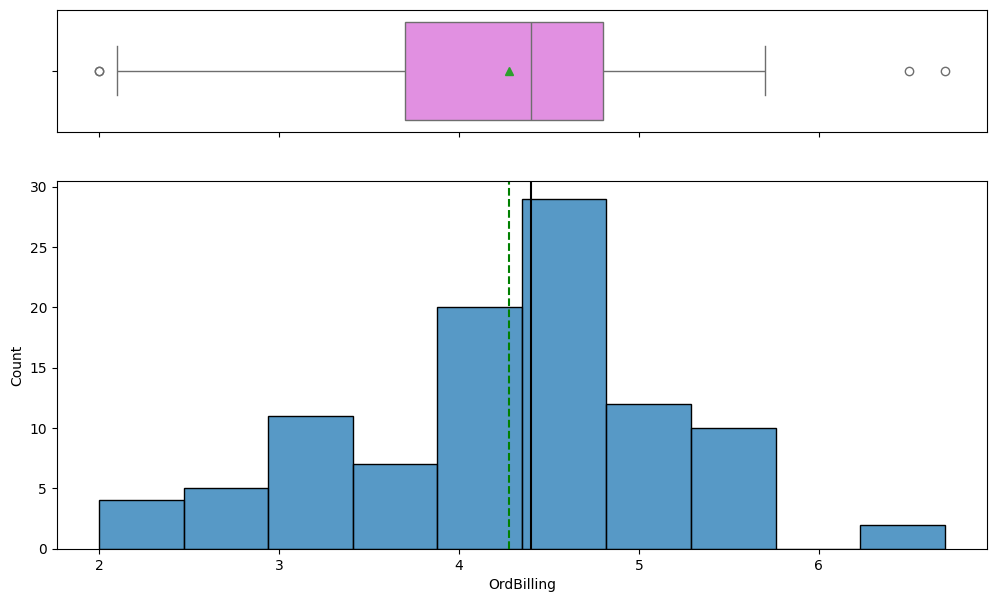

In [ ]:
histogram_boxplot(data, 'OrdBilling', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for OrdBilling

#### `DelSpeed`

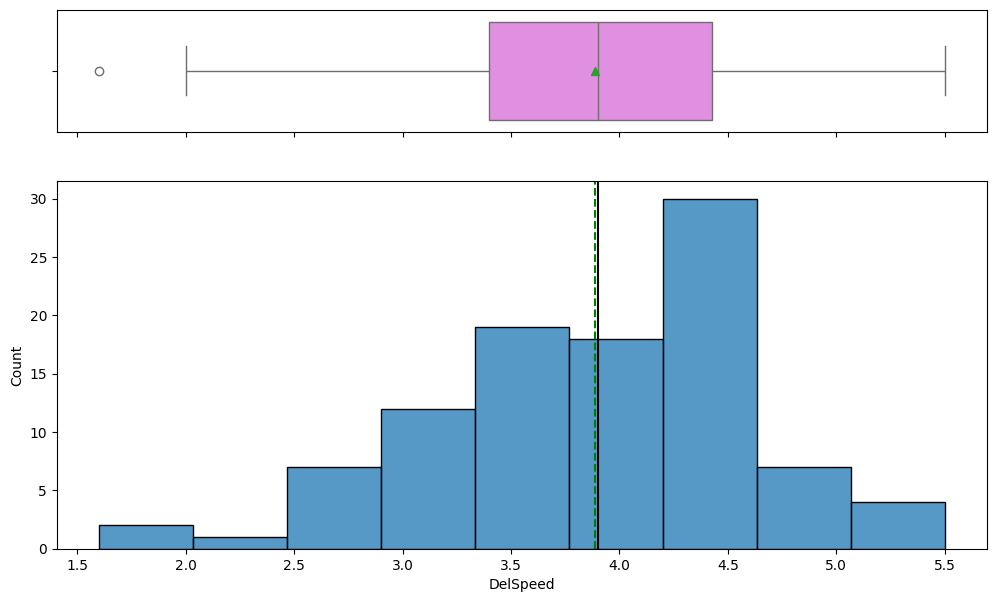

In [ ]:
histogram_boxplot(data, 'DelSpeed', figsize=(12, 7), kde=False, bins=None)        ## Complete the code to plot the histogram and boxplot for DelSpeed

### Bivariate Analysis

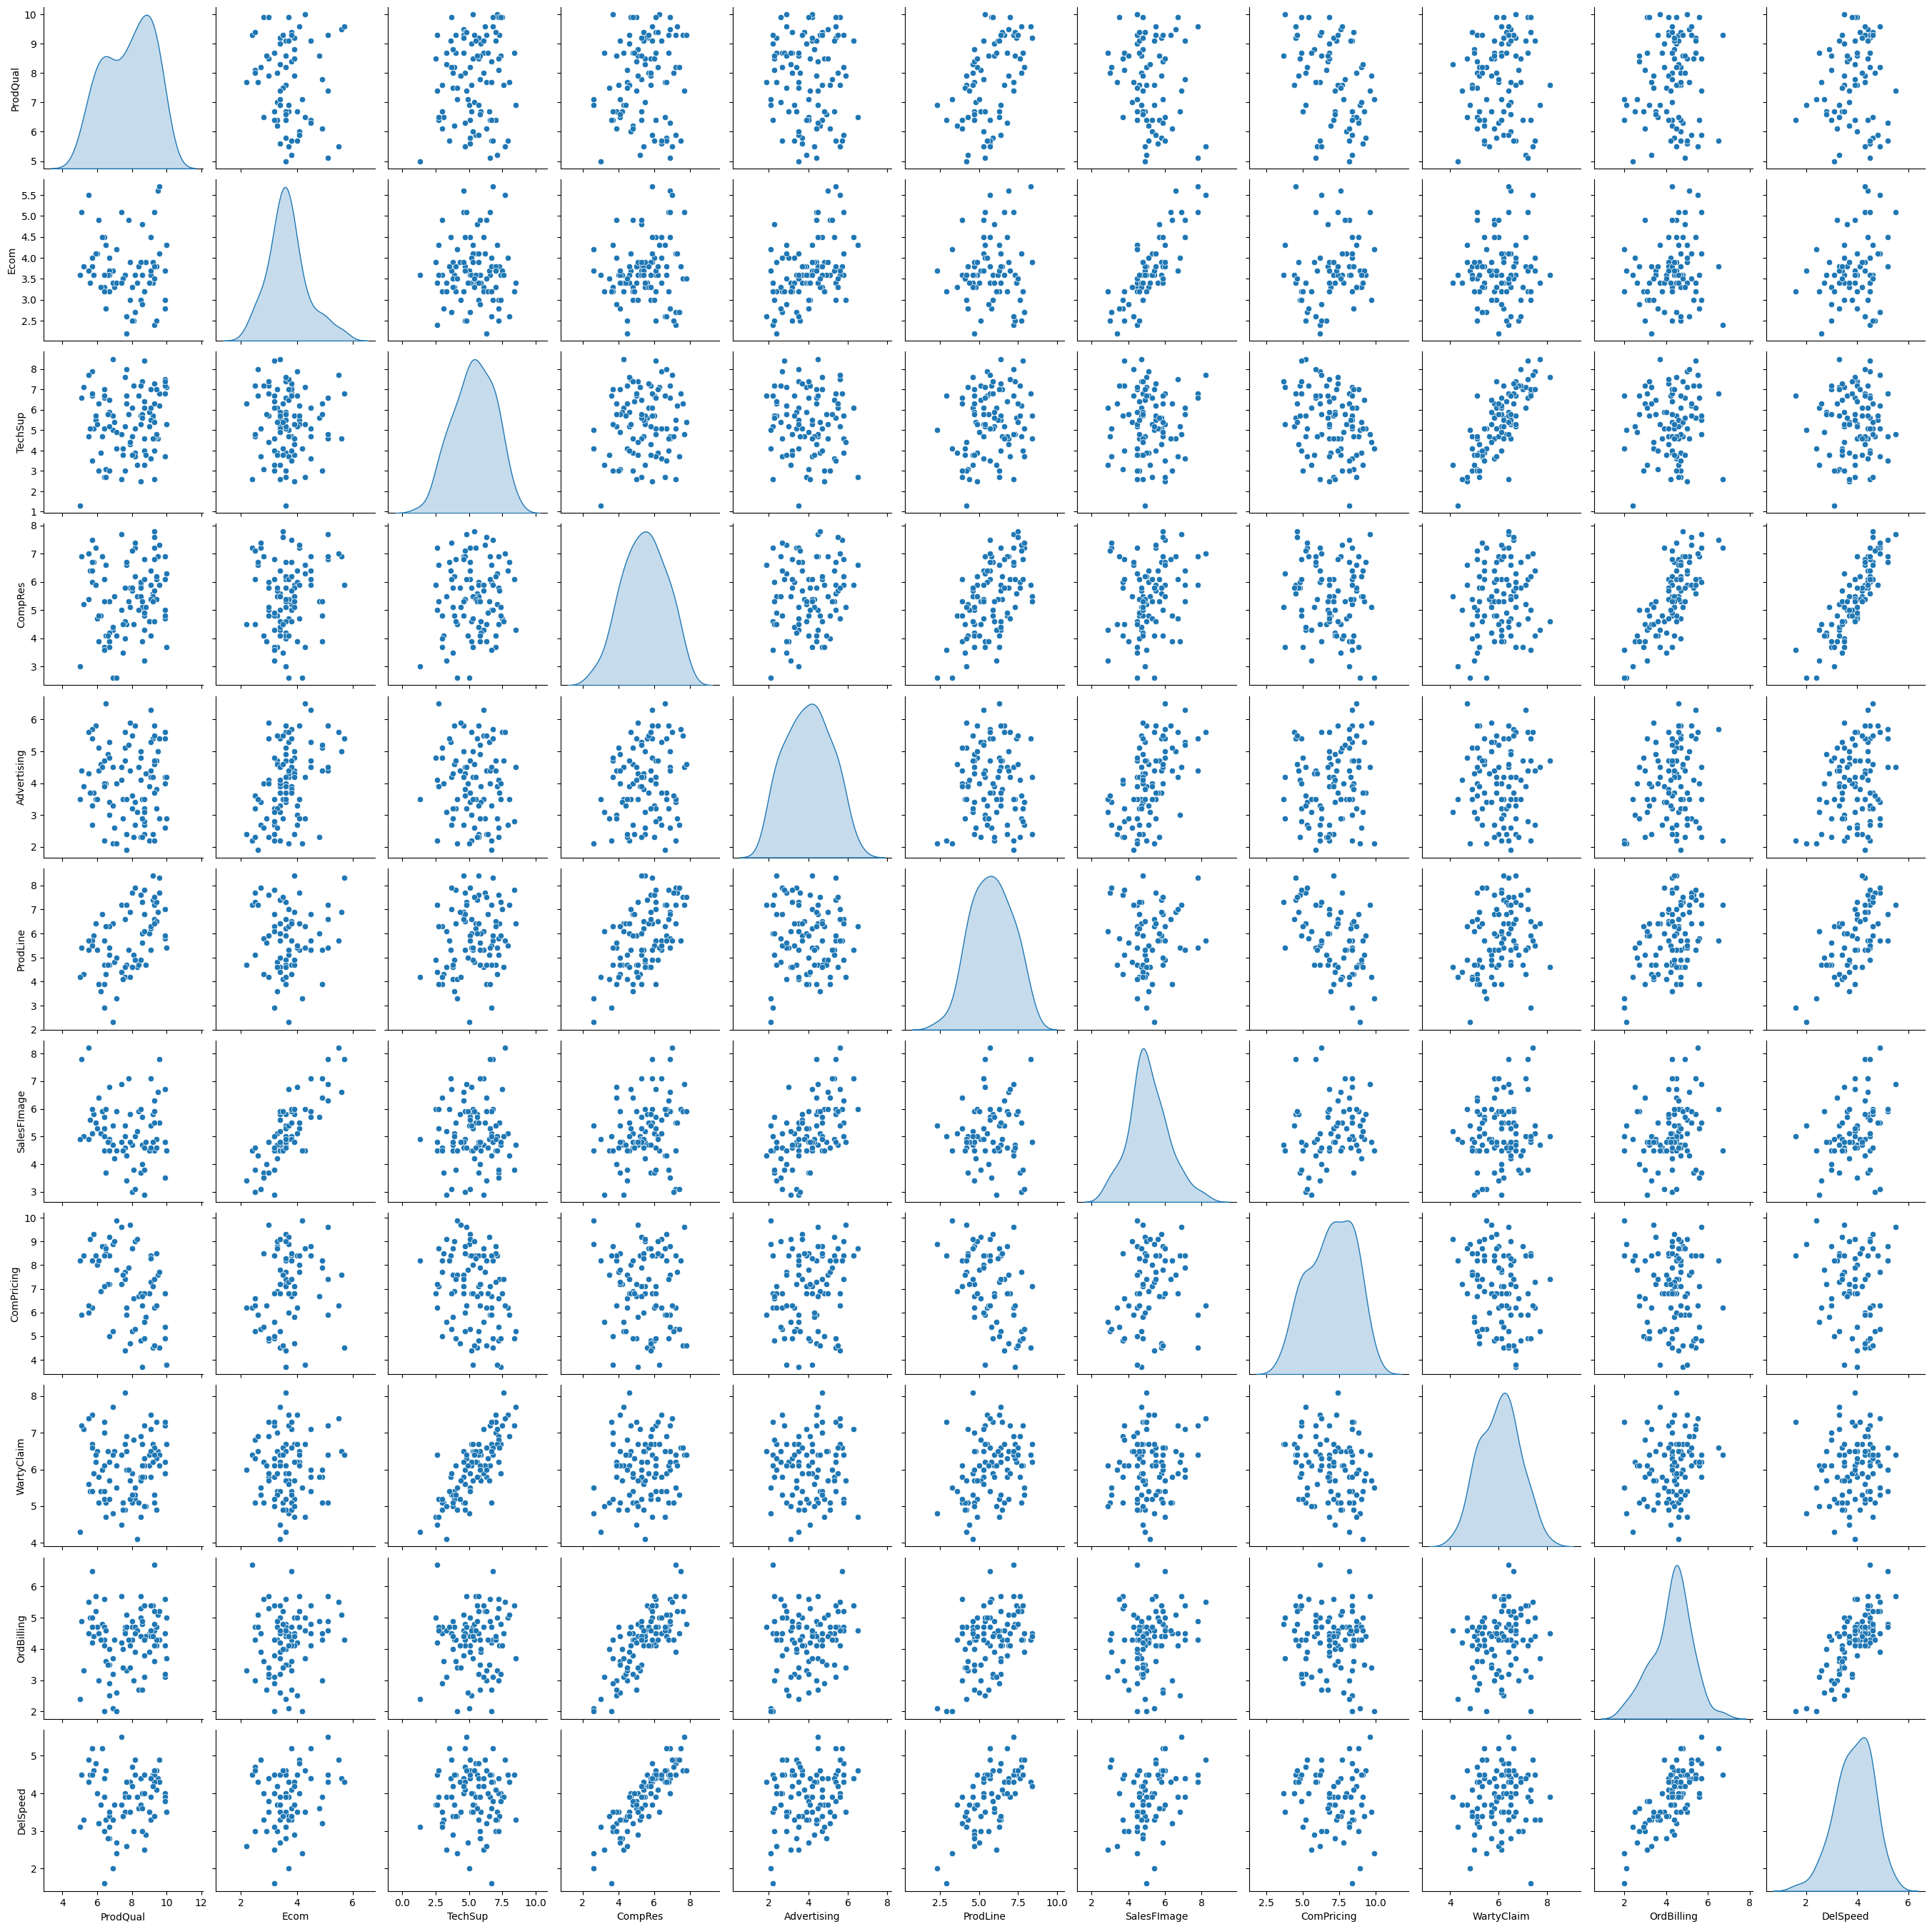

In [ ]:
sns.pairplot(data=data, diag_kind="kde")
plt.show()

## Data Preprocessing

In [ ]:
# scaling the data before clustering
scaler = StandardScaler()
subset = data.copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## Checking the outliers after scaling

**Use the same above code (which is used in univariate analysis) to check the outliers and add the observations.**

## Step 1- Create the covariance Matrix

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(random_state=123)                       ## Complete the code to apply PCA
df_pca = pca.fit_transform(subset_scaled_df)

In [ ]:
# Replace the problematic line with the following:
pd.DataFrame(np.round(pca.get_covariance(), 2), columns=subset_scaled_df.columns, index=subset_scaled_df.columns) #cov matrix

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
ProdQual,1.01,-0.14,0.10,0.11,-0.05,0.48,-0.15,-0.41,0.09,0.11,0.03
Ecom,-0.14,1.01,0.00,0.14,0.43,-0.05,0.80,0.23,0.05,0.16,0.19
TechSup,0.10,0.00,1.01,0.10,-0.06,0.19,0.02,-0.27,0.81,0.08,0.03
CompRes,0.11,0.14,0.10,1.01,0.20,0.57,0.23,-0.13,0.14,0.76,0.87
Advertising,-0.05,0.43,-0.06,0.20,1.01,-0.01,0.55,0.14,0.01,0.19,0.28
ProdLine,0.48,-0.05,0.19,0.57,-0.01,1.01,-0.06,-0.50,0.28,0.43,0.61
SalesFImage,-0.15,0.80,0.02,0.23,0.55,-0.06,1.01,0.27,0.11,0.20,0.27
ComPricing,-0.41,0.23,-0.27,-0.13,0.14,-0.50,0.27,1.01,-0.25,-0.12,-0.07
WartyClaim,0.09,0.05,0.81,0.14,0.01,0.28,0.11,-0.25,1.01,0.20,0.11
OrdBilling,0.11,0.16,0.08,0.76,0.19,0.43,0.20,-0.12,0.20,1.01,0.76


## Step 2- Get eigen values and eigen vector

In [ ]:
eigenvec= pca.components_                                     ## Complete the code to apply PCA components
print('Eigenvectors:',np.round(eigenvec,2))

Eigenvectors: [[ 0.13  0.17  0.16  0.47  0.18  0.39  0.2  -0.15  0.21  0.44  0.47]
 [-0.31  0.45 -0.23  0.02  0.36 -0.28  0.47  0.41 -0.19  0.03  0.07]
 [-0.06  0.24  0.61 -0.21  0.09 -0.12  0.24 -0.05  0.6  -0.17 -0.23]
 [ 0.64  0.27 -0.19 -0.21  0.32  0.2   0.22 -0.33 -0.19 -0.24 -0.2 ]
 [-0.23 -0.42  0.02 -0.03  0.8  -0.12 -0.2  -0.25  0.03 -0.03  0.04]
 [ 0.56 -0.26  0.11  0.03  0.2  -0.1  -0.1   0.71  0.14  0.12 -0.03]
 [ 0.19  0.06 -0.02 -0.01 -0.06 -0.61  0.   -0.31 -0.03  0.66 -0.23]
 [ 0.14 -0.12  0.46  0.51 -0.05 -0.33  0.17 -0.1  -0.44 -0.37  0.07]
 [ 0.03 -0.54 -0.36  0.09 -0.15 -0.08  0.64 -0.09  0.32 -0.1  -0.02]
 [ 0.07  0.28 -0.39  0.53  0.04 -0.23 -0.35 -0.05  0.44 -0.3  -0.12]
 [ 0.18  0.06 -0.05 -0.36 -0.08 -0.39 -0.08 -0.1   0.13 -0.19  0.78]]


In [ ]:
eigenvalues= pca.explained_variance_                                  ## Complete the code to apply PCA Explained Variance
print('Eigenvalues:',np.round(eigenvalues,2))

Eigenvalues: [3.46 2.58 1.71 1.1  0.62 0.56 0.41 0.25 0.21 0.13 0.1 ]


In [ ]:
var_exp=np.round(pca.explained_variance_ratio_,2)*100

In [ ]:
var_exp

array([31., 23., 15., 10.,  6.,  5.,  4.,  2.,  2.,  1.,  1.])

## Step 3 View Scree Plot to identify the number of components to be built

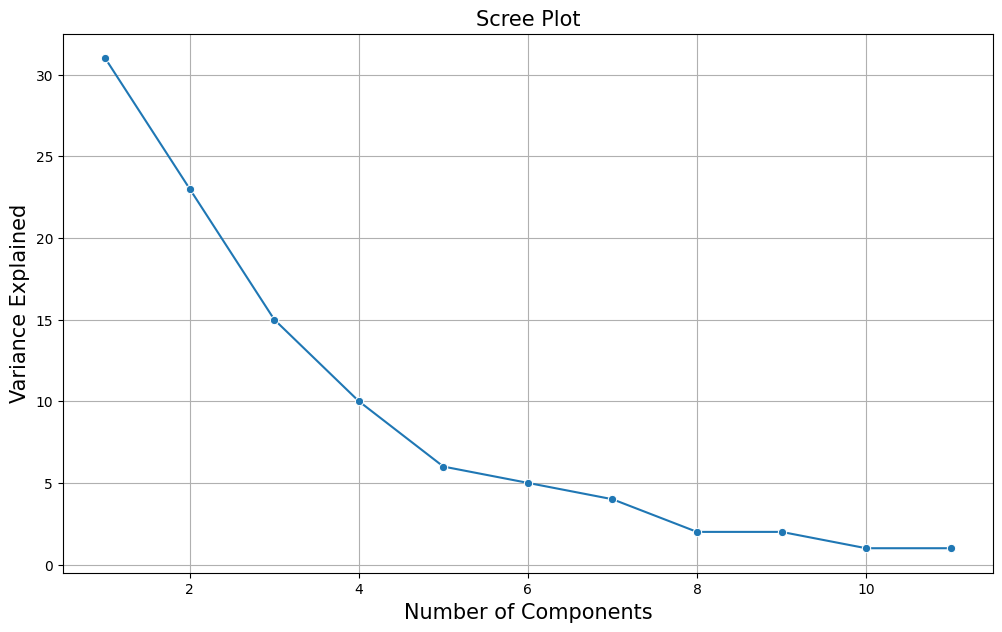

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

## Step 4 Apply PCA for the number of decided components to get the loadings and component output

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11,random_state=123)        ## Complete the code to apply the appropriate PCA components from the above plot
df_pca = pca.fit_transform(subset_scaled_df)
df_pca.transpose() # Component output

array([[-0.0795508 ,  1.10096634,  2.19706653, ..., -3.19577568,
         0.62088819, -1.63523181],
       [ 1.54319843, -2.42029823, -0.72744044, ..., -1.86292048,
         2.34984871,  1.25986453],
       [-1.89504643, -2.04552113, -0.16680026, ..., -1.29747695,
         1.12785588, -0.40255069],
       ...,
       [ 0.44484537, -0.40787741,  0.38871416, ..., -0.69044976,
        -0.08262926,  0.17869371],
       [ 0.03867319,  0.46637257, -0.81054552, ...,  0.13343324,
        -0.26297433,  0.37326589],
       [-0.33948838,  0.21361315,  0.08570392, ..., -0.31962405,
        -0.01658993, -0.01321407]])

In [ ]:
# Creating a DataFrame for loadings
df_pca_loading = pd.DataFrame(pca.components_,
                              columns=list(subset_scaled_df),
                              index=['PC'+str(i) for i in range(pca.n_components_)]) # Creating index dynamically based on number of components
df_pca_loading.shape

(11, 11)

In [ ]:
df_pca_loading = np.round(df_pca_loading,2)

In [ ]:
df_pca_loading.style.highlight_max(color = 'lightgreen', axis = 0)

,ProdQual,Ecom,TechSup,CompRes,Advertising,ProdLine,SalesFImage,ComPricing,WartyClaim,OrdBilling,DelSpeed
PC0,0.130000,0.170000,0.160000,0.470000,0.180000,0.390000,0.200000,-0.150000,0.210000,0.440000,0.470000
PC1,-0.310000,0.450000,-0.230000,0.020000,0.360000,-0.280000,0.470000,0.410000,-0.190000,0.030000,0.070000
PC2,-0.060000,0.240000,0.610000,-0.210000,0.090000,-0.120000,0.240000,-0.050000,0.600000,-0.170000,-0.230000
PC3,0.640000,0.270000,-0.190000,-0.210000,0.320000,0.200000,0.220000,-0.330000,-0.190000,-0.240000,-0.200000
PC4,-0.230000,-0.420000,0.020000,-0.030000,0.800000,-0.120000,-0.200000,-0.250000,0.030000,-0.030000,0.040000
PC5,0.560000,-0.260000,0.110000,0.030000,0.200000,-0.100000,-0.100000,0.710000,0.140000,0.120000,-0.030000
PC6,0.190000,0.060000,-0.020000,-0.010000,-0.060000,-0.610000,0.000000,-0.310000,-0.030000,0.660000,-0.230000
PC7,0.140000,-0.120000,0.460000,0.510000,-0.050000,-0.330000,0.170000,-0.100000,-0.440000,-0.370000,0.070000
PC8,0.030000,-0.540000,-0.360000,0.090000,-0.150000,-0.080000,0.640000,-0.090000,0.320000,-0.100000,-0.020000
PC9,0.070000,0.280000,-0.390000,0.530000,0.040000,-0.230000,-0.350000,-0.050000,0.440000,-0.300000,-0.120000


In [ ]:
# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=df_pca, columns=["Component 1", "Component 2", "Component 3", "Component 4"]
)

# checking the amount of variance explained
print(
    f"The first two principal components explain {np.round(100*pca.explained_variance_ratio_.sum(), 2)}% of the variance in the data."
)

ValueError: Shape of passed values is (100, 11), indices imply (100, 4)

<Axes: xlabel='Component 1', ylabel='Component 2'>

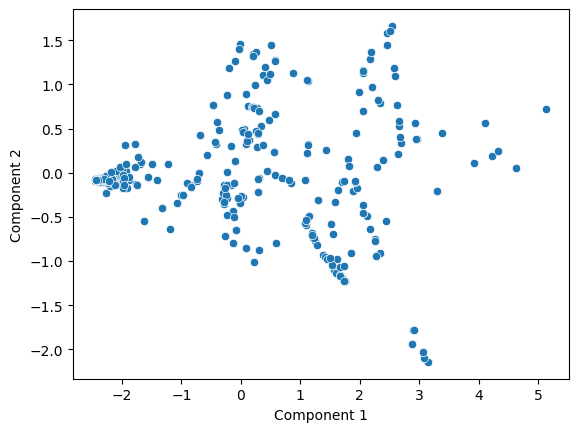

In [ ]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<Axes: xlabel='Component 1', ylabel='Component 2'>

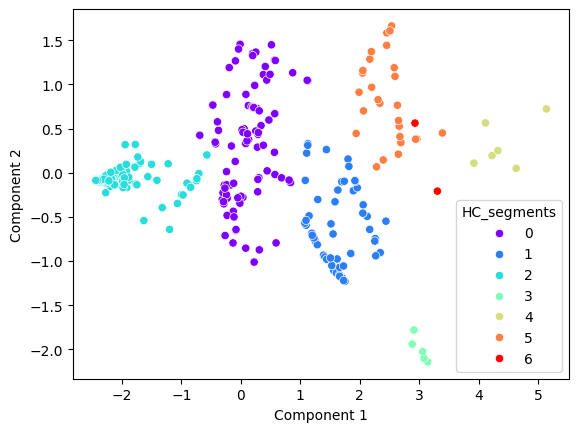

In [ ]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df2["HC_segments"],
    palette="rainbow",
)

In [ ]:
# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_                        ## Corrected the attribute name to 'explained_variance_ratio_'

# Interpretation of principal components
pc1_loadings = pca.components_[0]
pc2_loadings = pca.components_[1]

# Display results
print("Explained Variance Ratio:", explained_var_ratio)
print("Principal Component 1 Loadings:", pc1_loadings)
print("Principal Component 2 Loadings:", pc2_loadings)

Explained Variance Ratio: [0.31154285 0.2318997  0.15372513 0.09877782 0.05540219 0.05017125
 0.03650165 0.02245014 0.01850484 0.01207651 0.00894791]
Principal Component 1 Loadings: [ 0.13378962  0.16595278  0.15769263  0.47068359  0.18373495  0.38676517
  0.2036696  -0.15168864  0.21293363  0.43721774  0.47308914]
Principal Component 2 Loadings: [-0.31349802  0.44650918 -0.23096734  0.01944394  0.36366471 -0.28478056
  0.47069599  0.4134565  -0.19167191  0.02639905  0.07305172]


In [ ]:
# Cumulative explained variance ratio
cumulative_explained_var = np.cumsum(explained_var_ratio)           ## Complete the code to get the cumulative explained variance

# Display results
print("Cumulative Explained Variance:", cumulative_explained_var)

Cumulative Explained Variance: [0.31154285 0.54344255 0.69716768 0.79594551 0.8513477  0.90151895
 0.9380206  0.96047074 0.97897558 0.99105209 1.        ]


In [ ]:
# Applying K-means clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=1)
labels_original = kmeans_original.fit_predict(k_means_df)

In [ ]:
# Applying K-means clustering on PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=1)
labels_pca = kmeans_pca.fit_predict(df_pca)

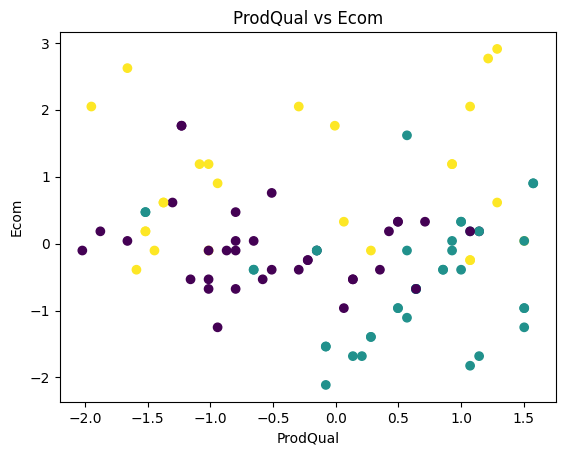

In [ ]:
# Applying K-means clustering on original data, but using subset_scaled_df instead of k_means_df
kmeans_original = KMeans(n_clusters=3, random_state=1)
labels_original = kmeans_original.fit_predict(subset_scaled_df)

# Now plot the scatter plot with the corrected labels
plt.scatter(subset_scaled_df['ProdQual'], subset_scaled_df['Ecom'], c=labels_original, cmap='viridis')
plt.title('ProdQual vs Ecom')
plt.xlabel('ProdQual')
plt.ylabel('Ecom')
plt.show()

<Axes: title={'center': 'Clustering on PCA Transformed Data'}, xlabel='Component 1', ylabel='Component 2'>

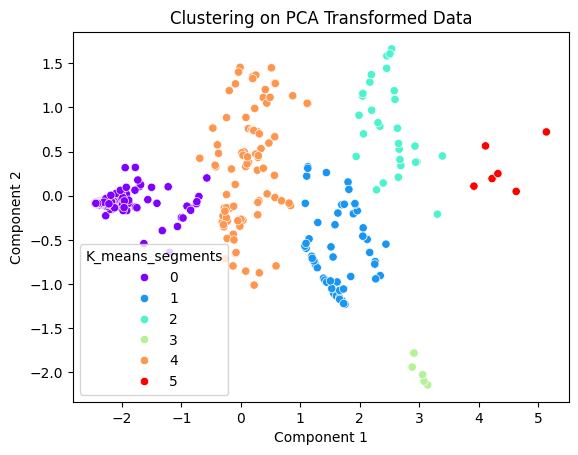

In [ ]:
plt.title('Clustering on PCA Transformed Data')
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df1["K_means_segments"],
    palette="rainbow",
)